In [1]:
# import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\Rainfall.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

object data and float data present 

null values present 

In [4]:
# check null values 
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
# check unique and whitespaces
for i in df:
    x = df[i].value_counts()
    print('\n')
    print(x)



2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name:

In [6]:
# check unique values
for i in df:
    x = df[i].unique()
    print('\n','=='*30)
    print(x)


['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']

[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.3  

In [7]:
# check duplicates value
df.duplicated().sum()

1663

In [8]:
# delect duplicates values
df.drop_duplicates(inplace=True)

In [9]:
# check duplicates values
df.duplicated().sum()

0

In [10]:
# check null values
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [11]:
# filling null value usining KNNimputer
from sklearn.impute import KNNImputer 
imp = KNNImputer(n_neighbors=3)

In [12]:
# seprate object and numric data
object_data = []
numric_data =[]
for i in df:
    if df[i].dtype == 'O':
        object_data.append(i)
    else:
        numric_data.append(i)
    

In [13]:
df[numric_data]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        13.4     22.9       0.6          NaN       NaN           44.0   
1         7.4     25.1       0.0          NaN       NaN           44.0   
2        12.9     25.7       0.0          NaN       NaN           46.0   
3         9.2     28.0       0.0          NaN       NaN           24.0   
4        17.5     32.3       1.0          NaN       NaN           41.0   
...       ...      ...       ...          ...       ...            ...   
8420      2.8     23.4       0.0          NaN       NaN           31.0   
8421      3.6     25.3       0.0          NaN       NaN           22.0   
8422      5.4     26.9       0.0          NaN       NaN           37.0   
8423      7.8     27.0       0.0          NaN       NaN           28.0   
8424     14.9      NaN       0.0          NaN       NaN            NaN   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             20.0          24.0         71.0         22.0       1007.7   
1              4.0          22.0         44.0         25.0       1010.6   
2             19.0          26.0         38.0         30.0       1007.6   
3             11.0           9.0         45.0         16.0       1017.6   
4              7.0          20.0         82.0         33.0       1010.8   
...            ...           ...          ...          ...          ...   
8420          13.0          11.0         51.0         24.0       1024.6   
8421          13.0           9.0         56.0         21.0       1023.5   
8422           9.0           9.0         53.0         24.0       1021.0   
8423          13.0           7.0         51.0         24.0       1019.4   
8424          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1007.1       8.0       NaN     16.9     21.8  
1          1007.8       NaN       NaN     17.2     24.3  
2          1008.7       NaN       2.0     21.0     23.2  
3          1012.8       NaN       NaN     18.1     26.5  
4          1006.0       7.0       8.0     17.8     29.7  
...           ...       ...       ...      ...      ...  
8420       1020.3       NaN       NaN     10.1     22.4  
8421       1019.1       NaN       NaN     10.9     24.5  
8422       1016.8       NaN       NaN     12.5     26.1  
8423       1016.5       3.0       2.0     15.1     26.0  
8424       1017.9       8.0       8.0     15.0     20.9  

[6762 rows x 16 columns]

In [14]:
# filling null values uning Knnimputer 
for i in df[numric_data]:
    df[i]=imp.fit_transform(df[[i]])

In [15]:
# check null value
df[numric_data].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [16]:
# check numric value statustic
df[numric_data].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.540667     6.130123    10.482769     3.343713     2.733639   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.600000     0.000000     4.000000     7.890896   
50%      13.109145    23.500000     0.000000     5.302395     7.890896   
75%      17.400000    28.400000     1.200000     5.302395     9.200000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        13.376457      9.787577      9.548634    17.182700    18.498341   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        38.977663     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.027914     5.967638     2.474649     2.323276     5.722411   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.626311  1015.119923     4.336806     4.320988    17.900000   
75%    1020.900000  1018.400000     7.000000     6.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6762.000000  
mean     22.708561  
std       5.971845  
min       7.300000  
25%      18.400000  
50%      22.300000  
75%      26.800000  
max      44.100000

In [17]:
# check null value
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [18]:
# delect null values present in feature
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],inplace=True)

In [19]:
# check null value
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
# check shape
df.shape

(5266, 23)

In [21]:
df['Date']

0       2008-12-01
1       2008-12-02
2       2008-12-03
3       2008-12-04
4       2008-12-05
           ...    
8419    2017-06-20
8420    2017-06-21
8421    2017-06-22
8422    2017-06-23
8423    2017-06-24
Name: Date, Length: 5266, dtype: object

In [22]:
# seprate month and year from date feature
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [23]:
# delecte date feature
df.drop('Date',axis=1,inplace=True)

In [24]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      Albury     13.4     22.9       0.6     5.302395  7.890896           W   
1      Albury      7.4     25.1       0.0     5.302395  7.890896         WNW   
2      Albury     12.9     25.7       0.0     5.302395  7.890896         WSW   
3      Albury      9.2     28.0       0.0     5.302395  7.890896          NE   
4      Albury     17.5     32.3       1.0     5.302395  7.890896           W   
...       ...      ...      ...       ...          ...       ...         ...   
8419    Uluru      3.5     21.8       0.0     5.302395  7.890896           E   
8420    Uluru      2.8     23.4       0.0     5.302395  7.890896           E   
8421    Uluru      3.6     25.3       0.0     5.302395  7.890896         NNW   
8422    Uluru      5.4     26.9       0.0     5.302395  7.890896           N   
8423    Uluru      7.8     27.0       0.0     5.302395  7.890896          SE   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  Pressure3pm  \
0              44.0          W        WNW  ...       1007.7       1007.1   
1              44.0        NNW        WSW  ...       1010.6       1007.8   
2              46.0          W        WSW  ...       1007.6       1008.7   
3              24.0         SE          E  ...       1017.6       1012.8   
4              41.0        ENE         NW  ...       1010.8       1006.0   
...             ...        ...        ...  ...          ...          ...   
8419           31.0        ESE          E  ...       1024.7       1021.2   
8420           31.0         SE        ENE  ...       1024.6       1020.3   
8421           22.0         SE          N  ...       1023.5       1019.1   
8422           37.0         SE        WNW  ...       1021.0       1016.8   
8423           28.0        SSE          N  ...       1019.4       1016.5   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0     8.000000  4.320988     16.9     21.8         No            No  2008   
1     4.336806  4.320988     17.2     24.3         No            No  2008   
2     4.336806  2.000000     21.0     23.2         No            No  2008   
3     4.336806  4.320988     18.1     26.5         No            No  2008   
4     7.000000  8.000000     17.8     29.7         No            No  2008   
...        ...       ...      ...      ...        ...           ...   ...   
8419  4.336806  4.320988      9.4     20.9         No            No  2017   
8420  4.336806  4.320988     10.1     22.4         No            No  2017   
8421  4.336806  4.320988     10.9     24.5         No            No  2017   
8422  4.336806  4.320988     12.5     26.1         No            No  2017   
8423  3.000000  2.000000     15.1     26.0         No            No  2017   

      Month  
0        12  
1        12  
2        12  
3        12  
4        12  
...     ...  
8419      6  
8420      6  
8421      6  
8422      6  
8423      6  

[5266 rows x 24 columns]

In [25]:
# seprate object data 
Ob = []
for i in df:
    if df[i].dtype == 'O':
        Ob.append(i)

In [26]:
df[Ob]

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0      Albury           W          W        WNW        No           No
1      Albury         WNW        NNW        WSW        No           No
2      Albury         WSW          W        WSW        No           No
3      Albury          NE         SE          E        No           No
4      Albury           W        ENE         NW        No           No
...       ...         ...        ...        ...       ...          ...
8419    Uluru           E        ESE          E        No           No
8420    Uluru           E         SE        ENE        No           No
8421    Uluru         NNW         SE          N        No           No
8422    Uluru           N         SE        WNW        No           No
8423    Uluru          SE        SSE          N        No           No

[5266 rows x 6 columns]

In [27]:
# convert object data into int data usning Labelencoder 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [28]:
# convert object to int data 
for i in df[Ob]:
    df[i] = lb.fit_transform(df[[i]])

In [29]:
df[Ob]

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0            1           13          13          14          0             0
1            1           14           6          15          0             0
2            1           15          13          15          0             0
3            1            4           9           0          0             0
4            1           13           1           7          0             0
...        ...          ...         ...         ...        ...           ...
8419         8            0           2           0          0             0
8420         8            0           9           1          0             0
8421         8            6           9           3          0             0
8422         8            3           9          14          0             0
8423         8            9          10           3          0             0

[5266 rows x 6 columns]

In [30]:
# check statustic continous data 
df[numric_data].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  5266.000000  5266.000000  5266.000000  5266.000000  5266.000000   
mean     13.457829    24.379966     2.745404     5.317630     7.946807   
std       5.481139     6.243559     9.298133     3.076754     2.971998   
min      -1.300000     8.200000     0.000000     0.000000     0.000000   
25%       9.400000    19.800000     0.000000     3.600000     7.890896   
50%      13.450000    23.800000     0.000000     5.302395     7.890896   
75%      17.700000    28.800000     0.800000     6.000000     9.800000   
max      28.500000    45.500000   225.000000    59.200000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    5266.000000   5266.000000   5266.000000  5266.000000  5266.000000   
mean       39.804596     14.599126     18.737562    65.627897    49.643740   
std        14.099860      9.128572      8.815502    17.144967    18.781419   
min         9.000000      2.000000      2.000000    10.000000     6.000000   
25%        30.000000      7.000000     11.000000    54.000000    36.000000   
50%        37.000000     13.000000     19.000000    66.000000    49.000000   
75%        48.000000     20.000000     24.000000    78.000000    62.000000   
max       107.000000     61.000000     61.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  5266.000000  5266.000000  5266.000000  5266.000000  5266.000000   
mean   1017.445606  1014.946546     4.331431     4.305500    18.336611   
std       6.398660     6.330291     2.442047     2.344383     5.667166   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.300000  1010.600000     2.000000     2.000000    14.300000   
50%    1017.626311  1015.119923     4.336806     4.320988    18.200000   
75%    1021.400000  1018.900000     7.000000     6.000000    22.600000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  5266.000000  
mean     22.957028  
std       6.087052  
min       7.300000  
25%      18.600000  
50%      22.400000  
75%      27.100000  
max      44.100000

maxtemp, evaporation, sunshine,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure3pm,Temp9am and Temp3pm is right skewness and remaining is left skewness

Rainfall is diffrent is min, median and max is zero

In [31]:
# check skewness value
df.skew()

Location         0.018994
MinTemp         -0.043317
MaxTemp          0.296200
Rainfall         8.601063
Evaporation      3.568028
Sunshine        -0.801904
WindGustDir     -0.108008
WindGustSpeed    0.763216
WindDir9am      -0.023692
WindDir3pm      -0.083461
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.188031
Humidity3pm      0.168829
Pressure9am      0.023080
Pressure3pm      0.046177
Cloud9am        -0.198495
Cloud3pm        -0.140178
Temp9am         -0.011099
Temp3pm          0.318150
RainToday        1.211631
RainTomorrow     1.217713
Year             0.659710
Month            0.033387
dtype: float64

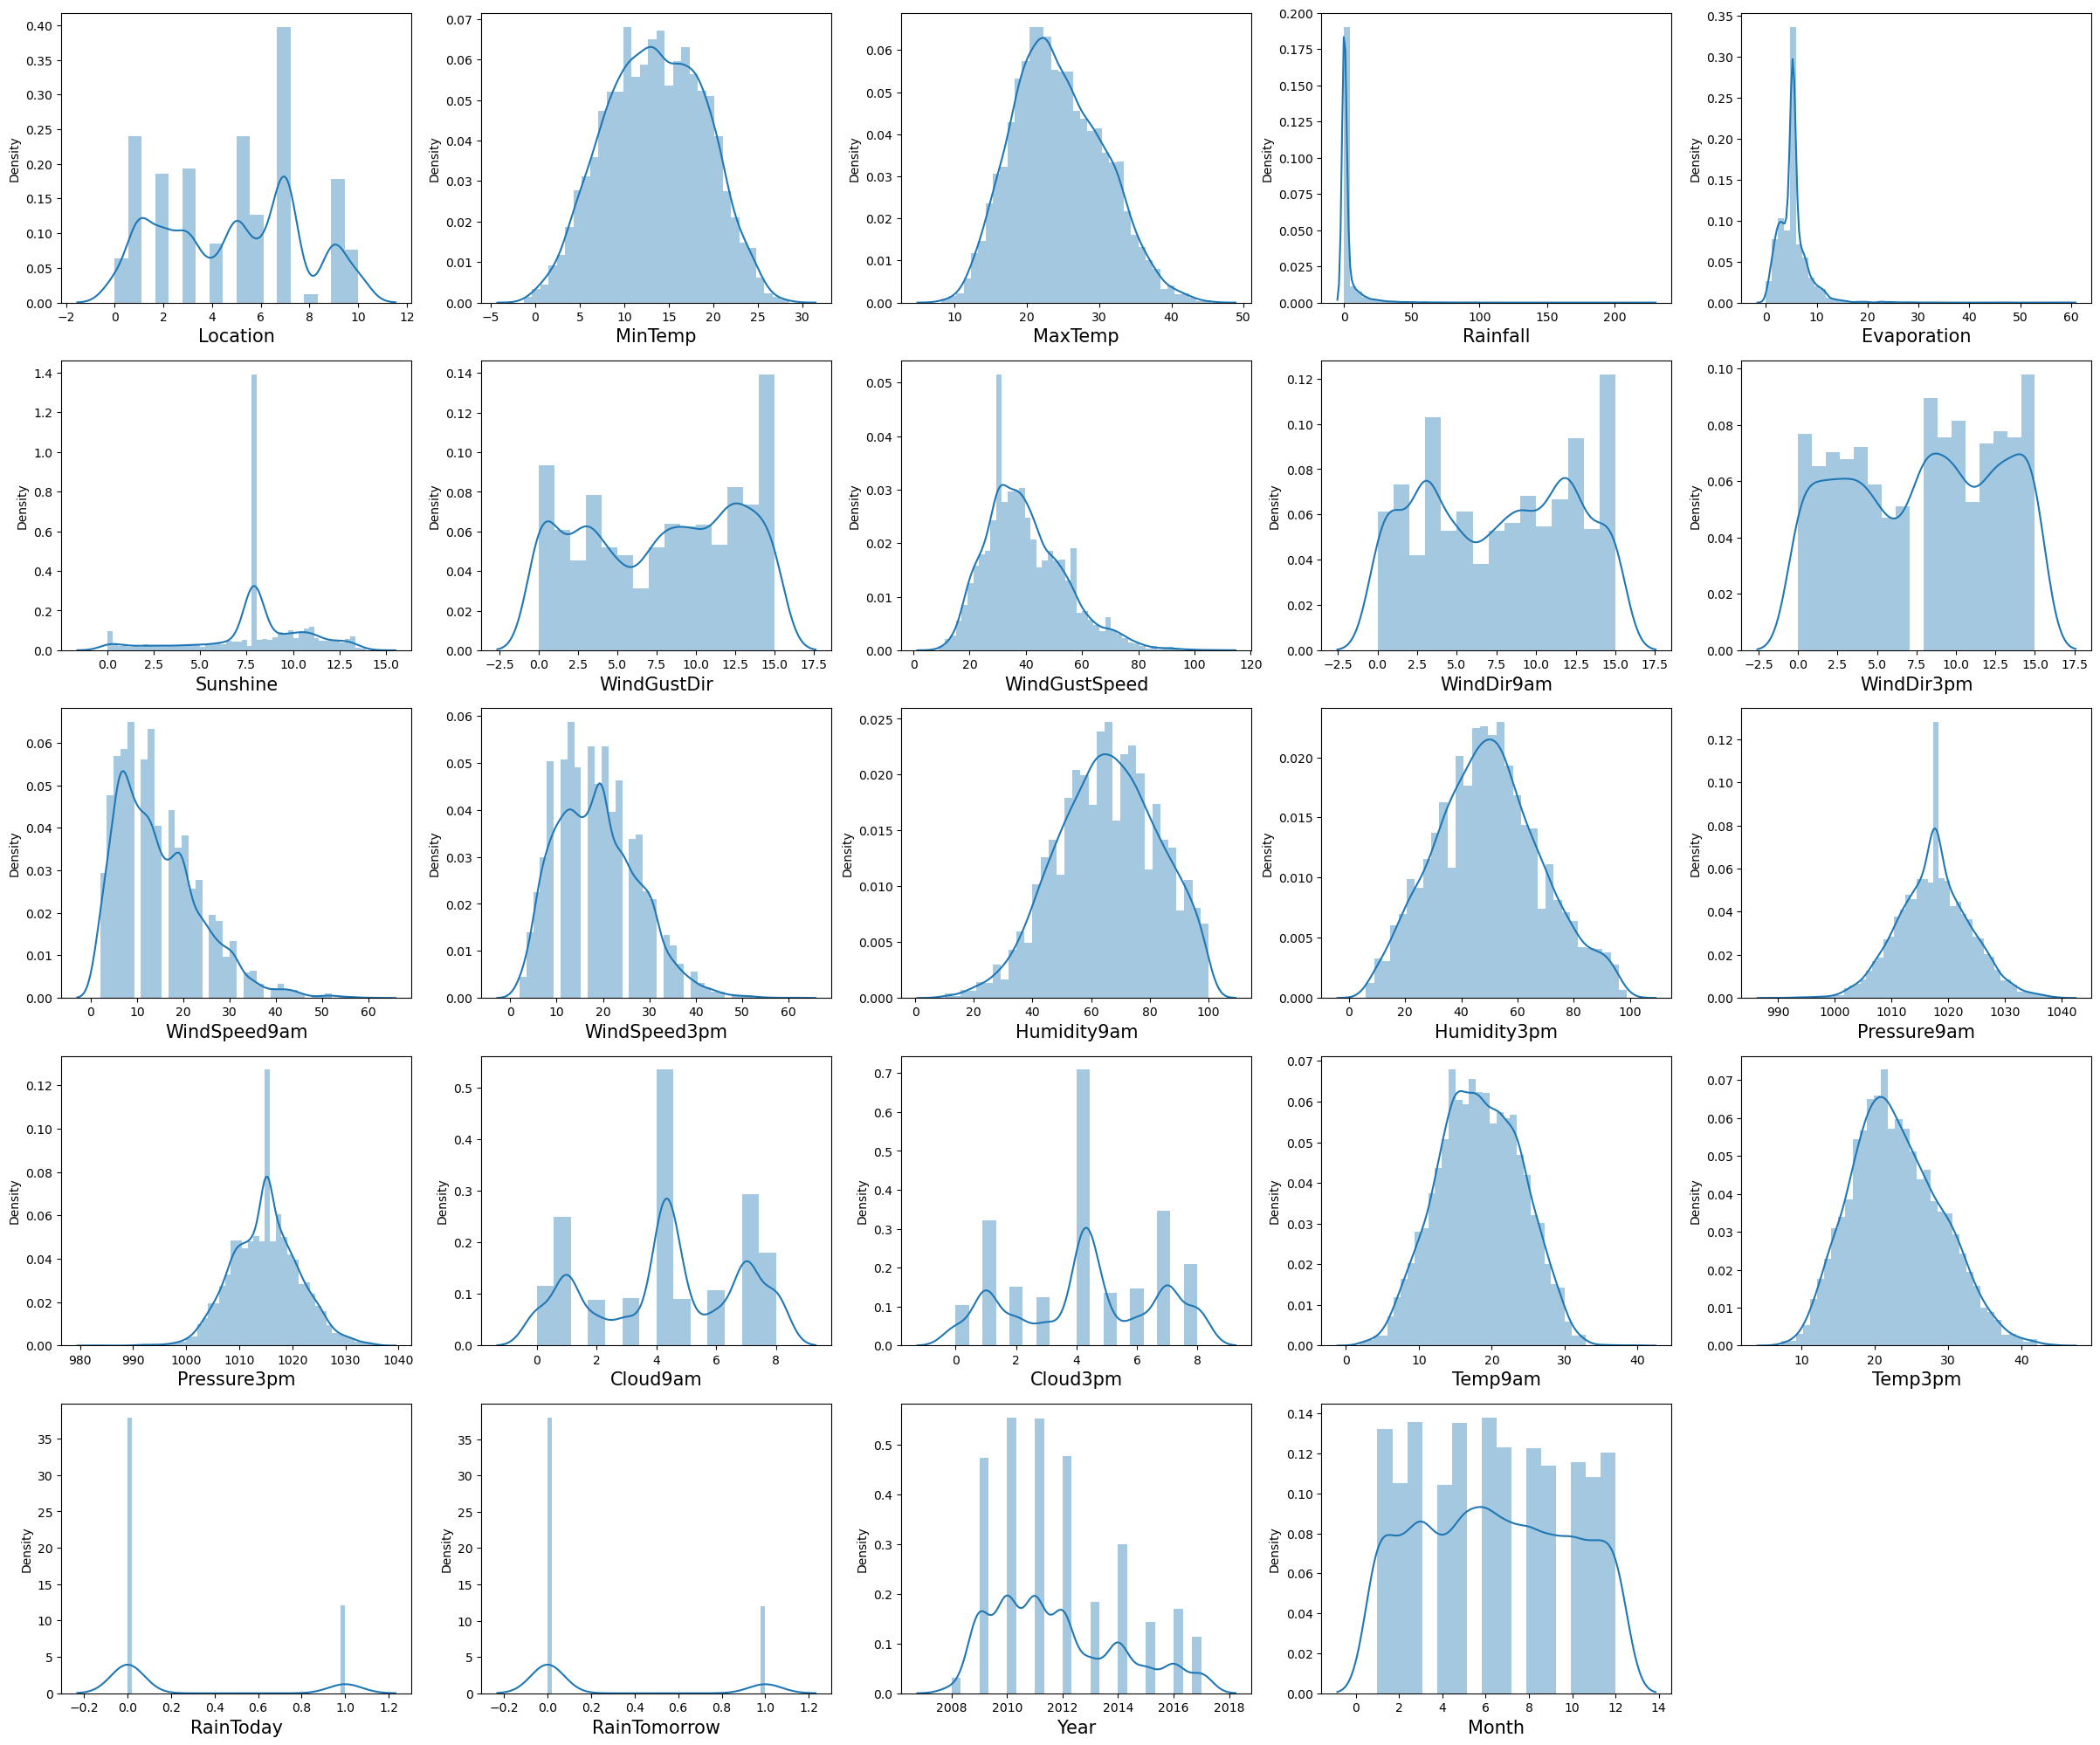

In [32]:
# check data distribution usiing distplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

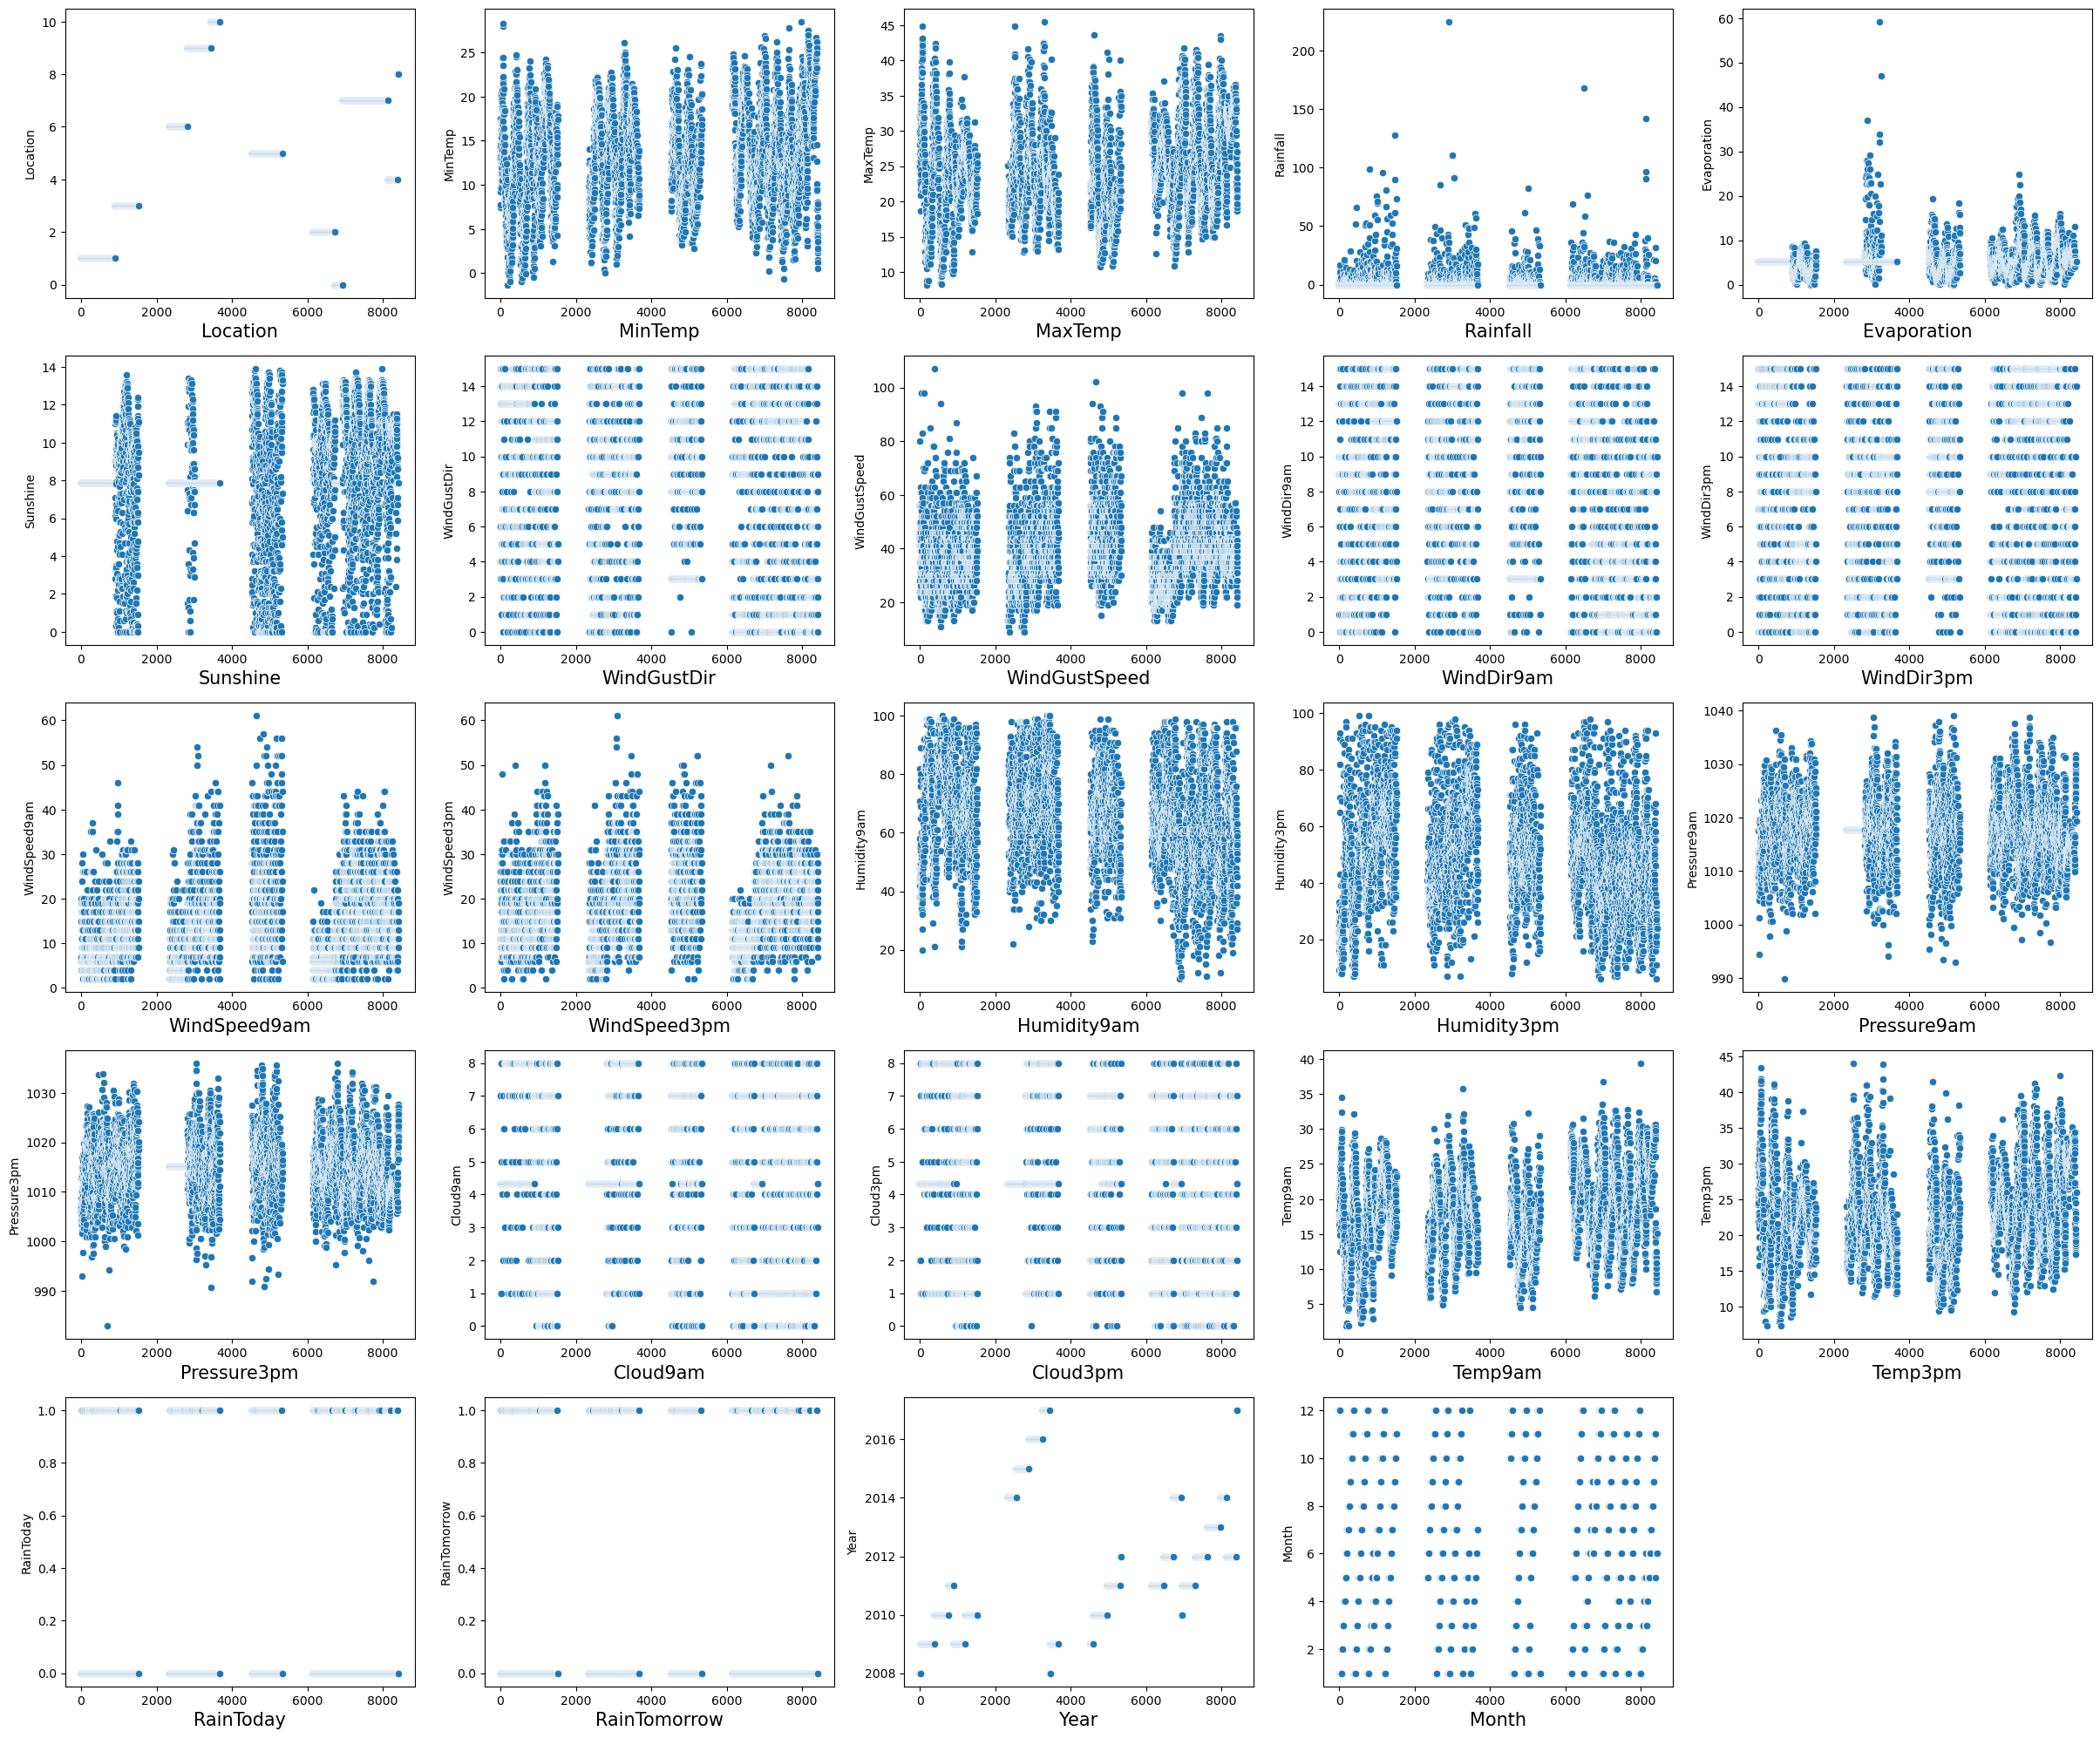

In [33]:
# check data distribution usning scatterplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.scatterplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

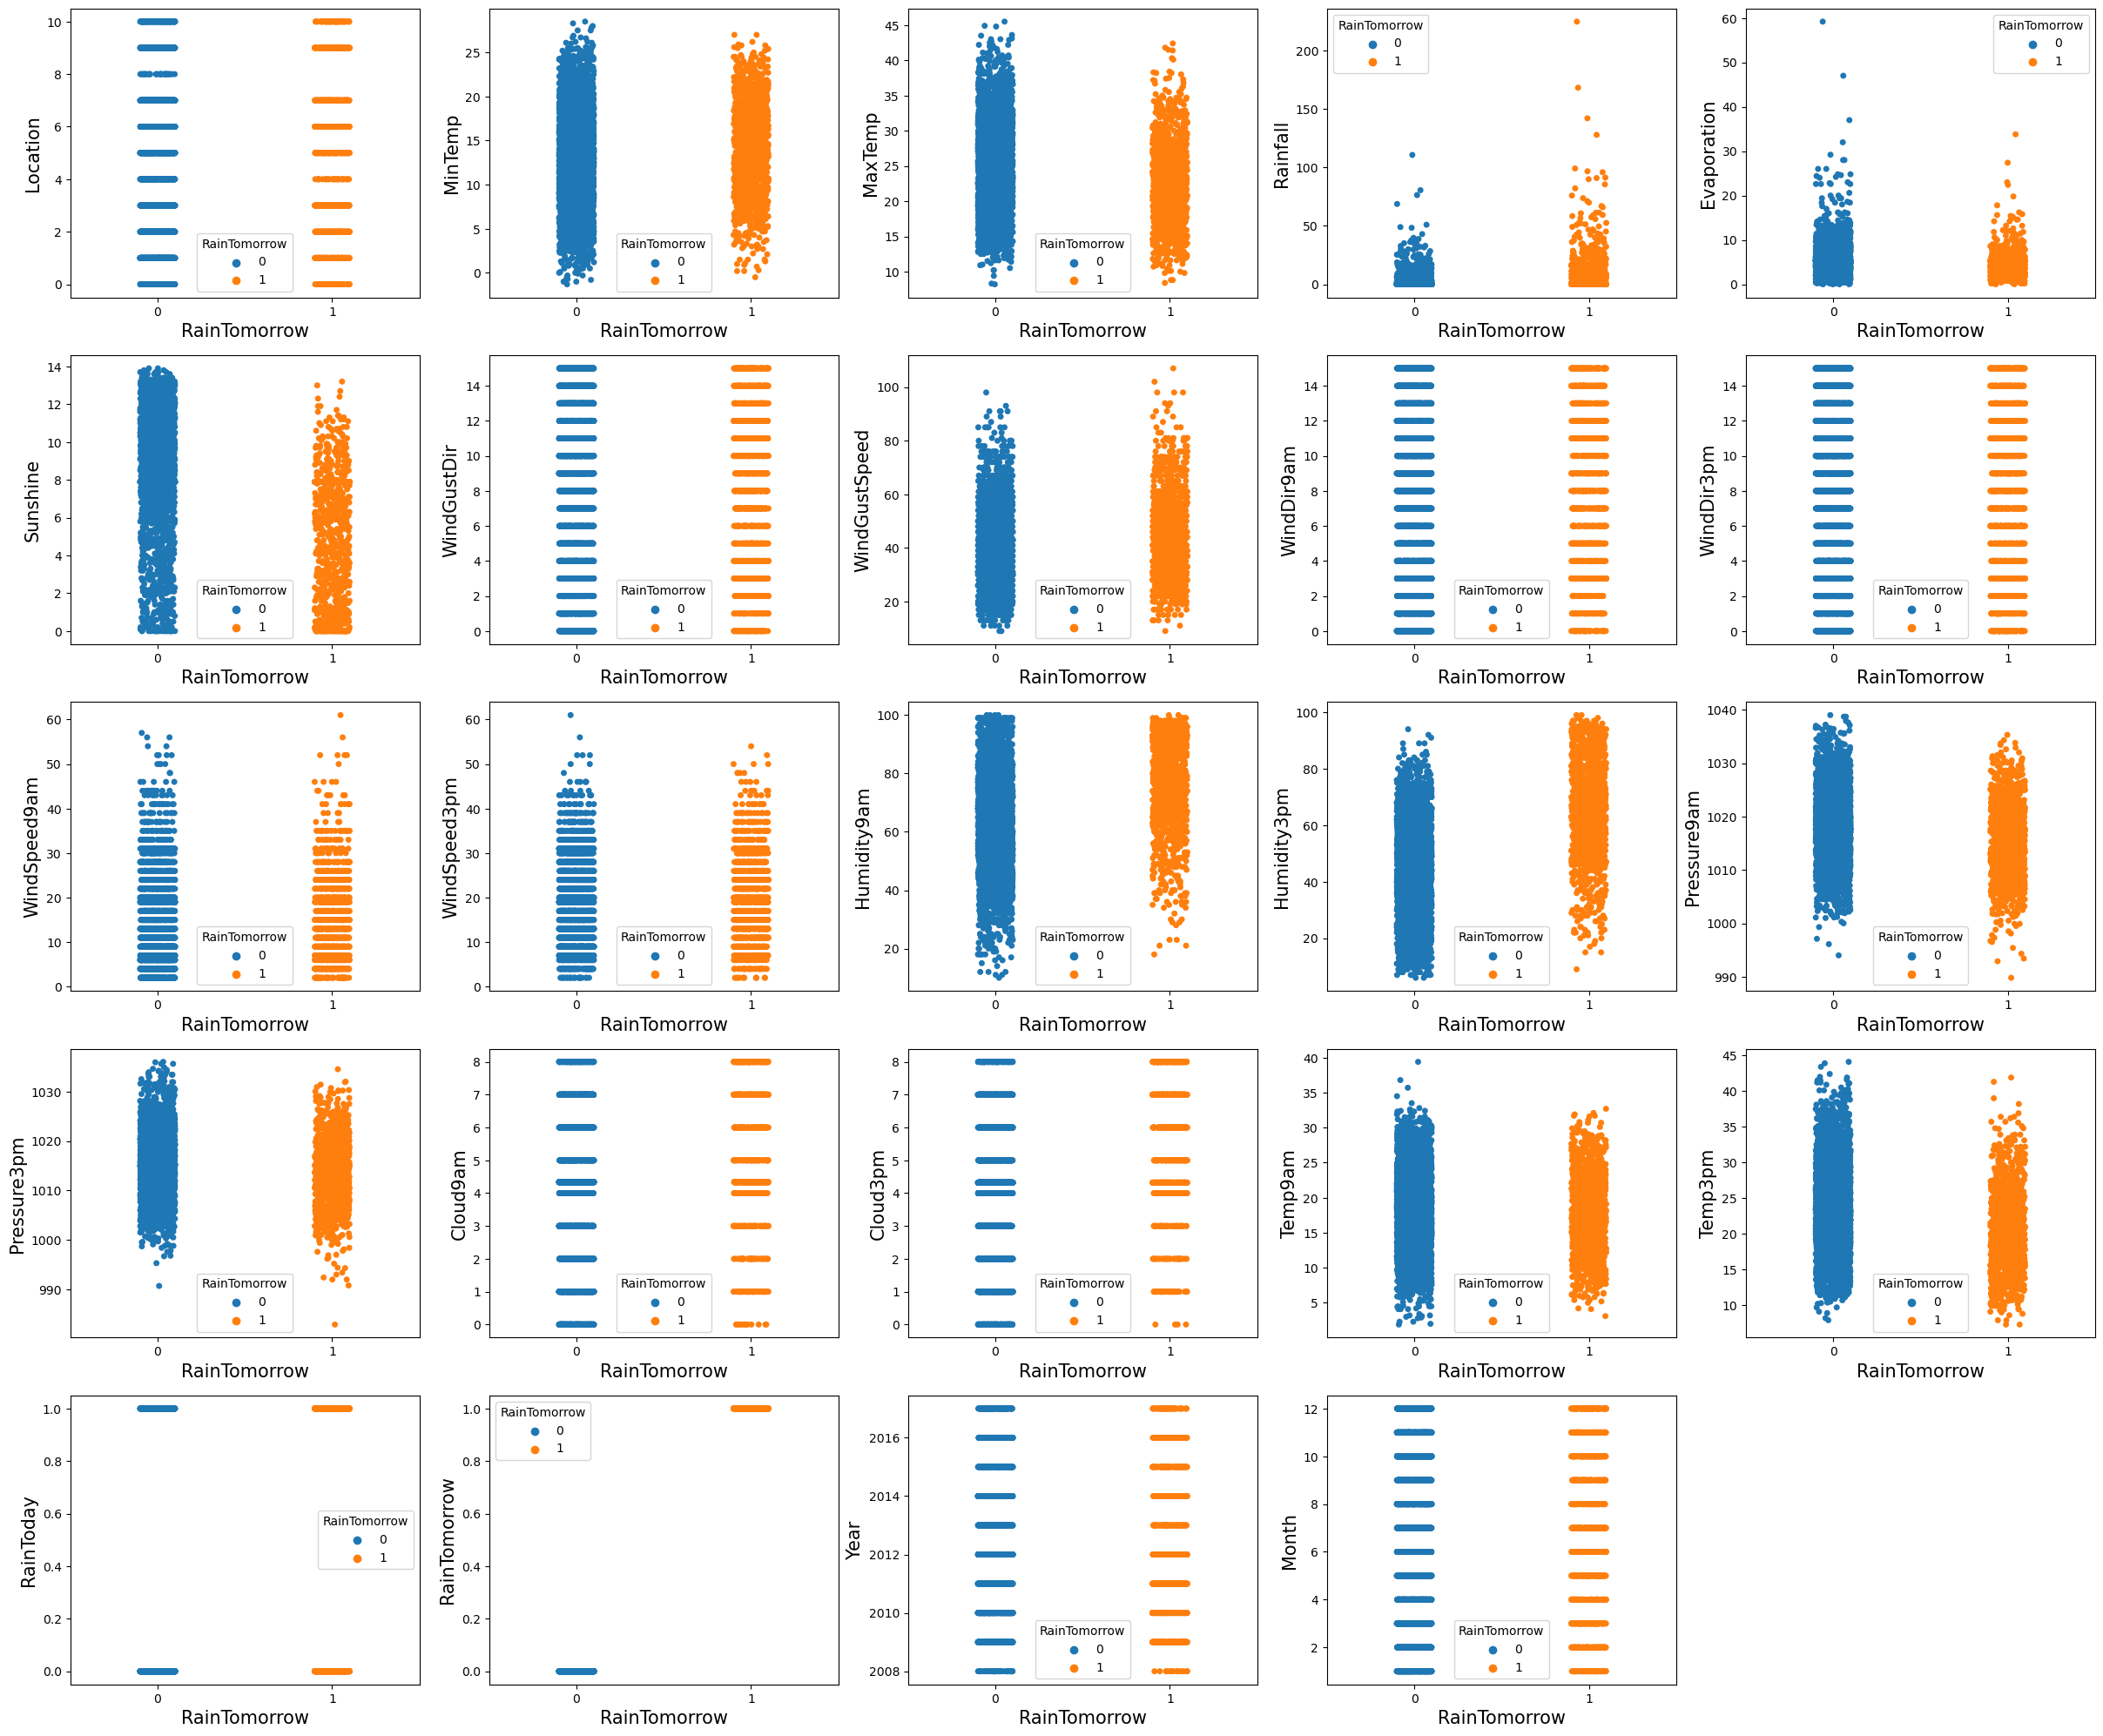

In [34]:
# check feature and label relationship usning stripplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.stripplot(data=df,x='RainTomorrow',y=i,hue='RainTomorrow')
        plt.ylabel(i,fontsize=15)
        plt.xlabel('RainTomorrow',fontsize=15)
    plotnumber+=1
plt.show()

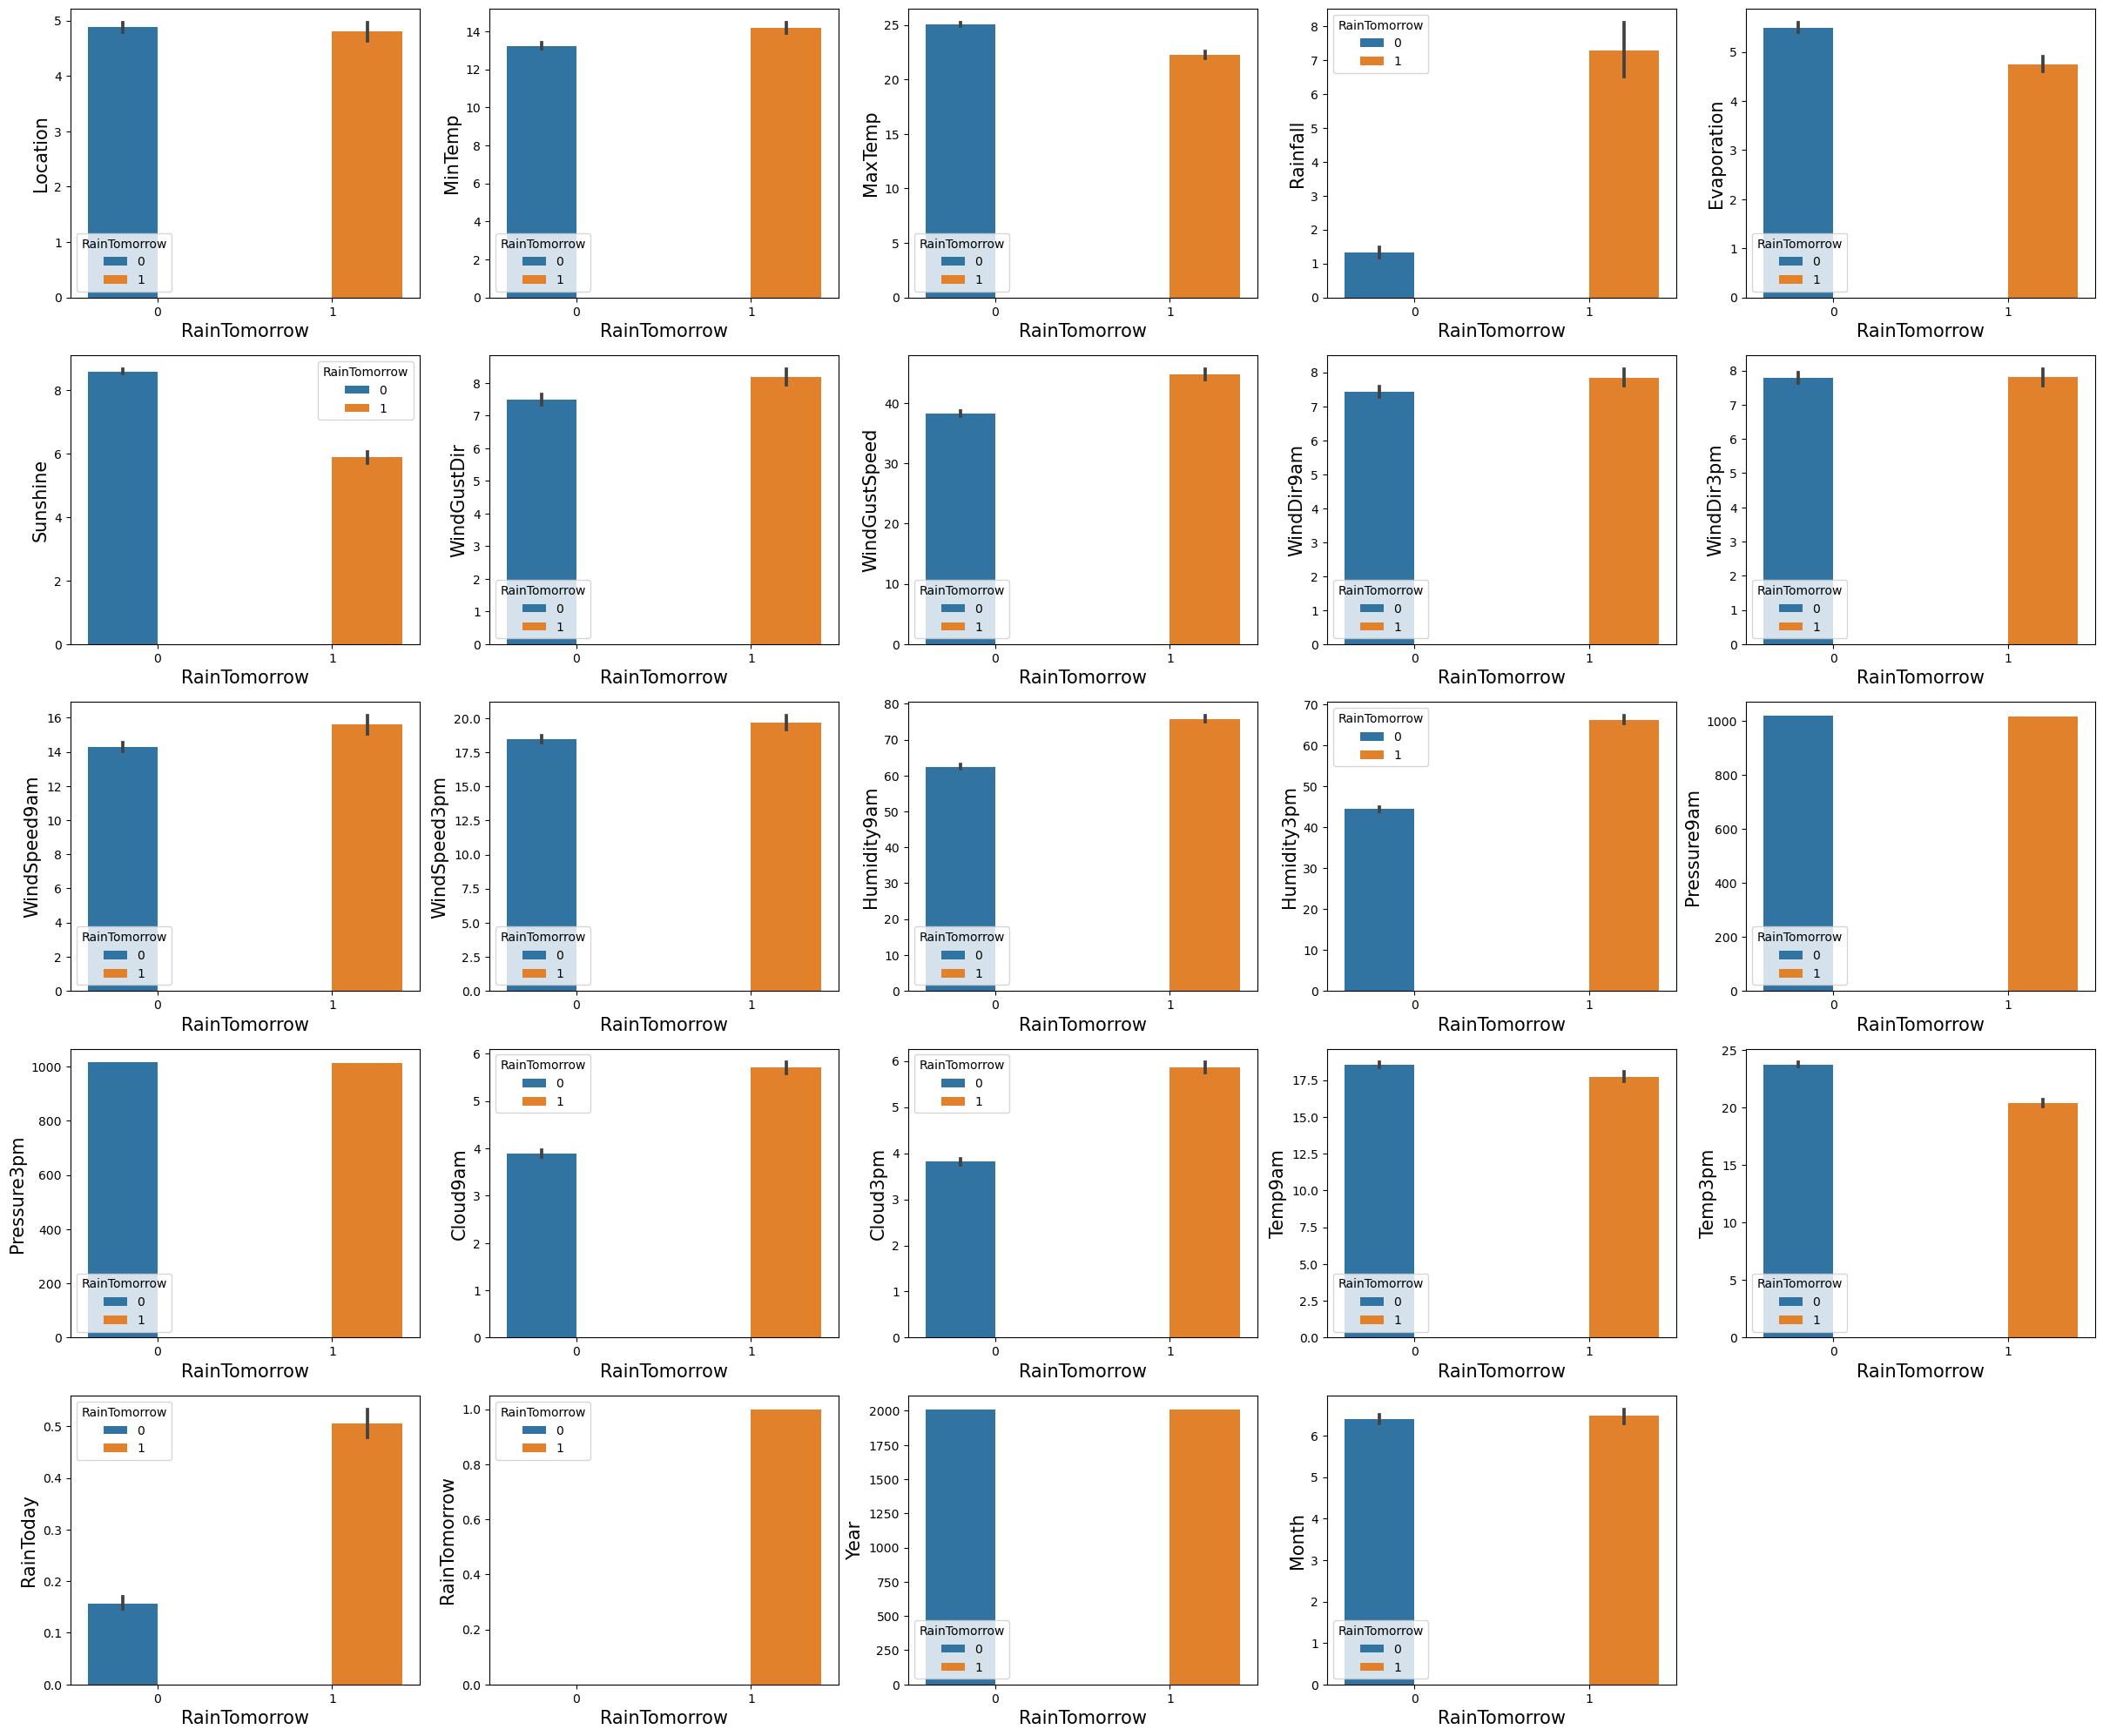

In [35]:
# check feature and label relationship usning barplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.barplot(data=df,x='RainTomorrow',y=i,hue='RainTomorrow')
        plt.ylabel(i,fontsize=15)
        plt.xlabel('RainTomorrow',fontsize=15)
    plotnumber+=1
plt.show()

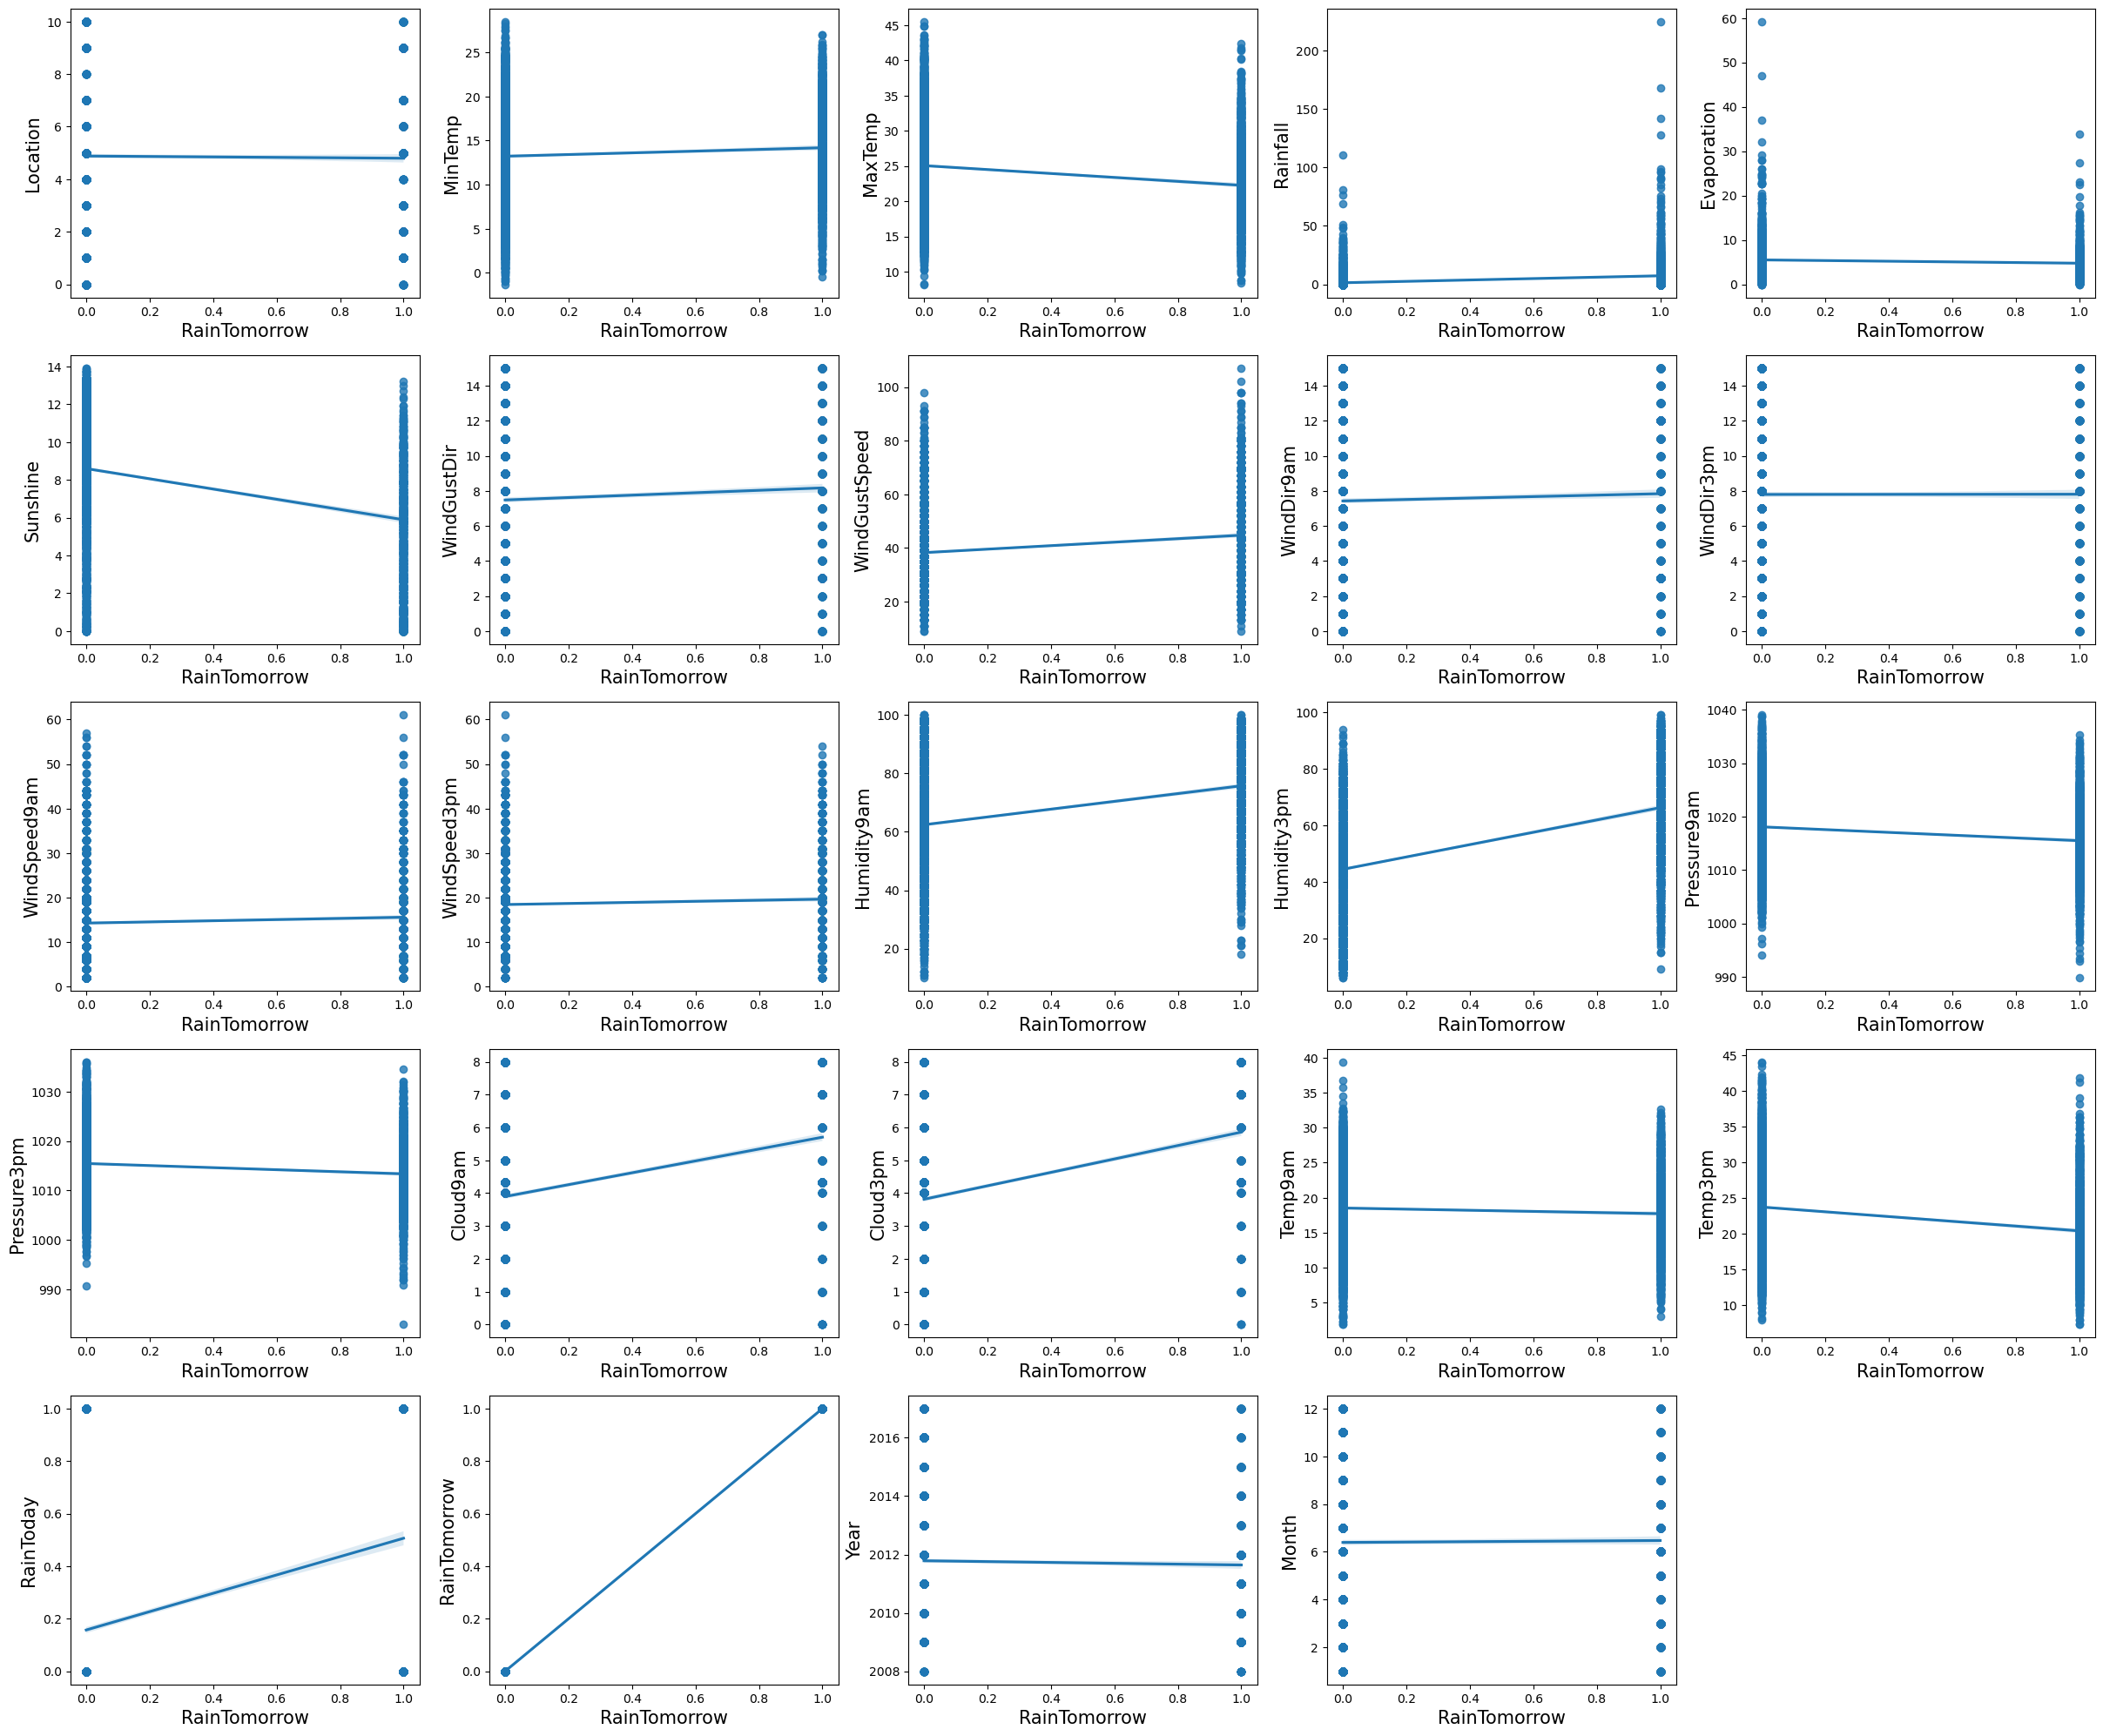

In [36]:
# check feature and label relationship usning regplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.regplot(data=df,x='RainTomorrow',y=i)
        plt.ylabel(i,fontsize=15)
        plt.xlabel('RainTomorrow',fontsize=15)
    plotnumber+=1
plt.show()

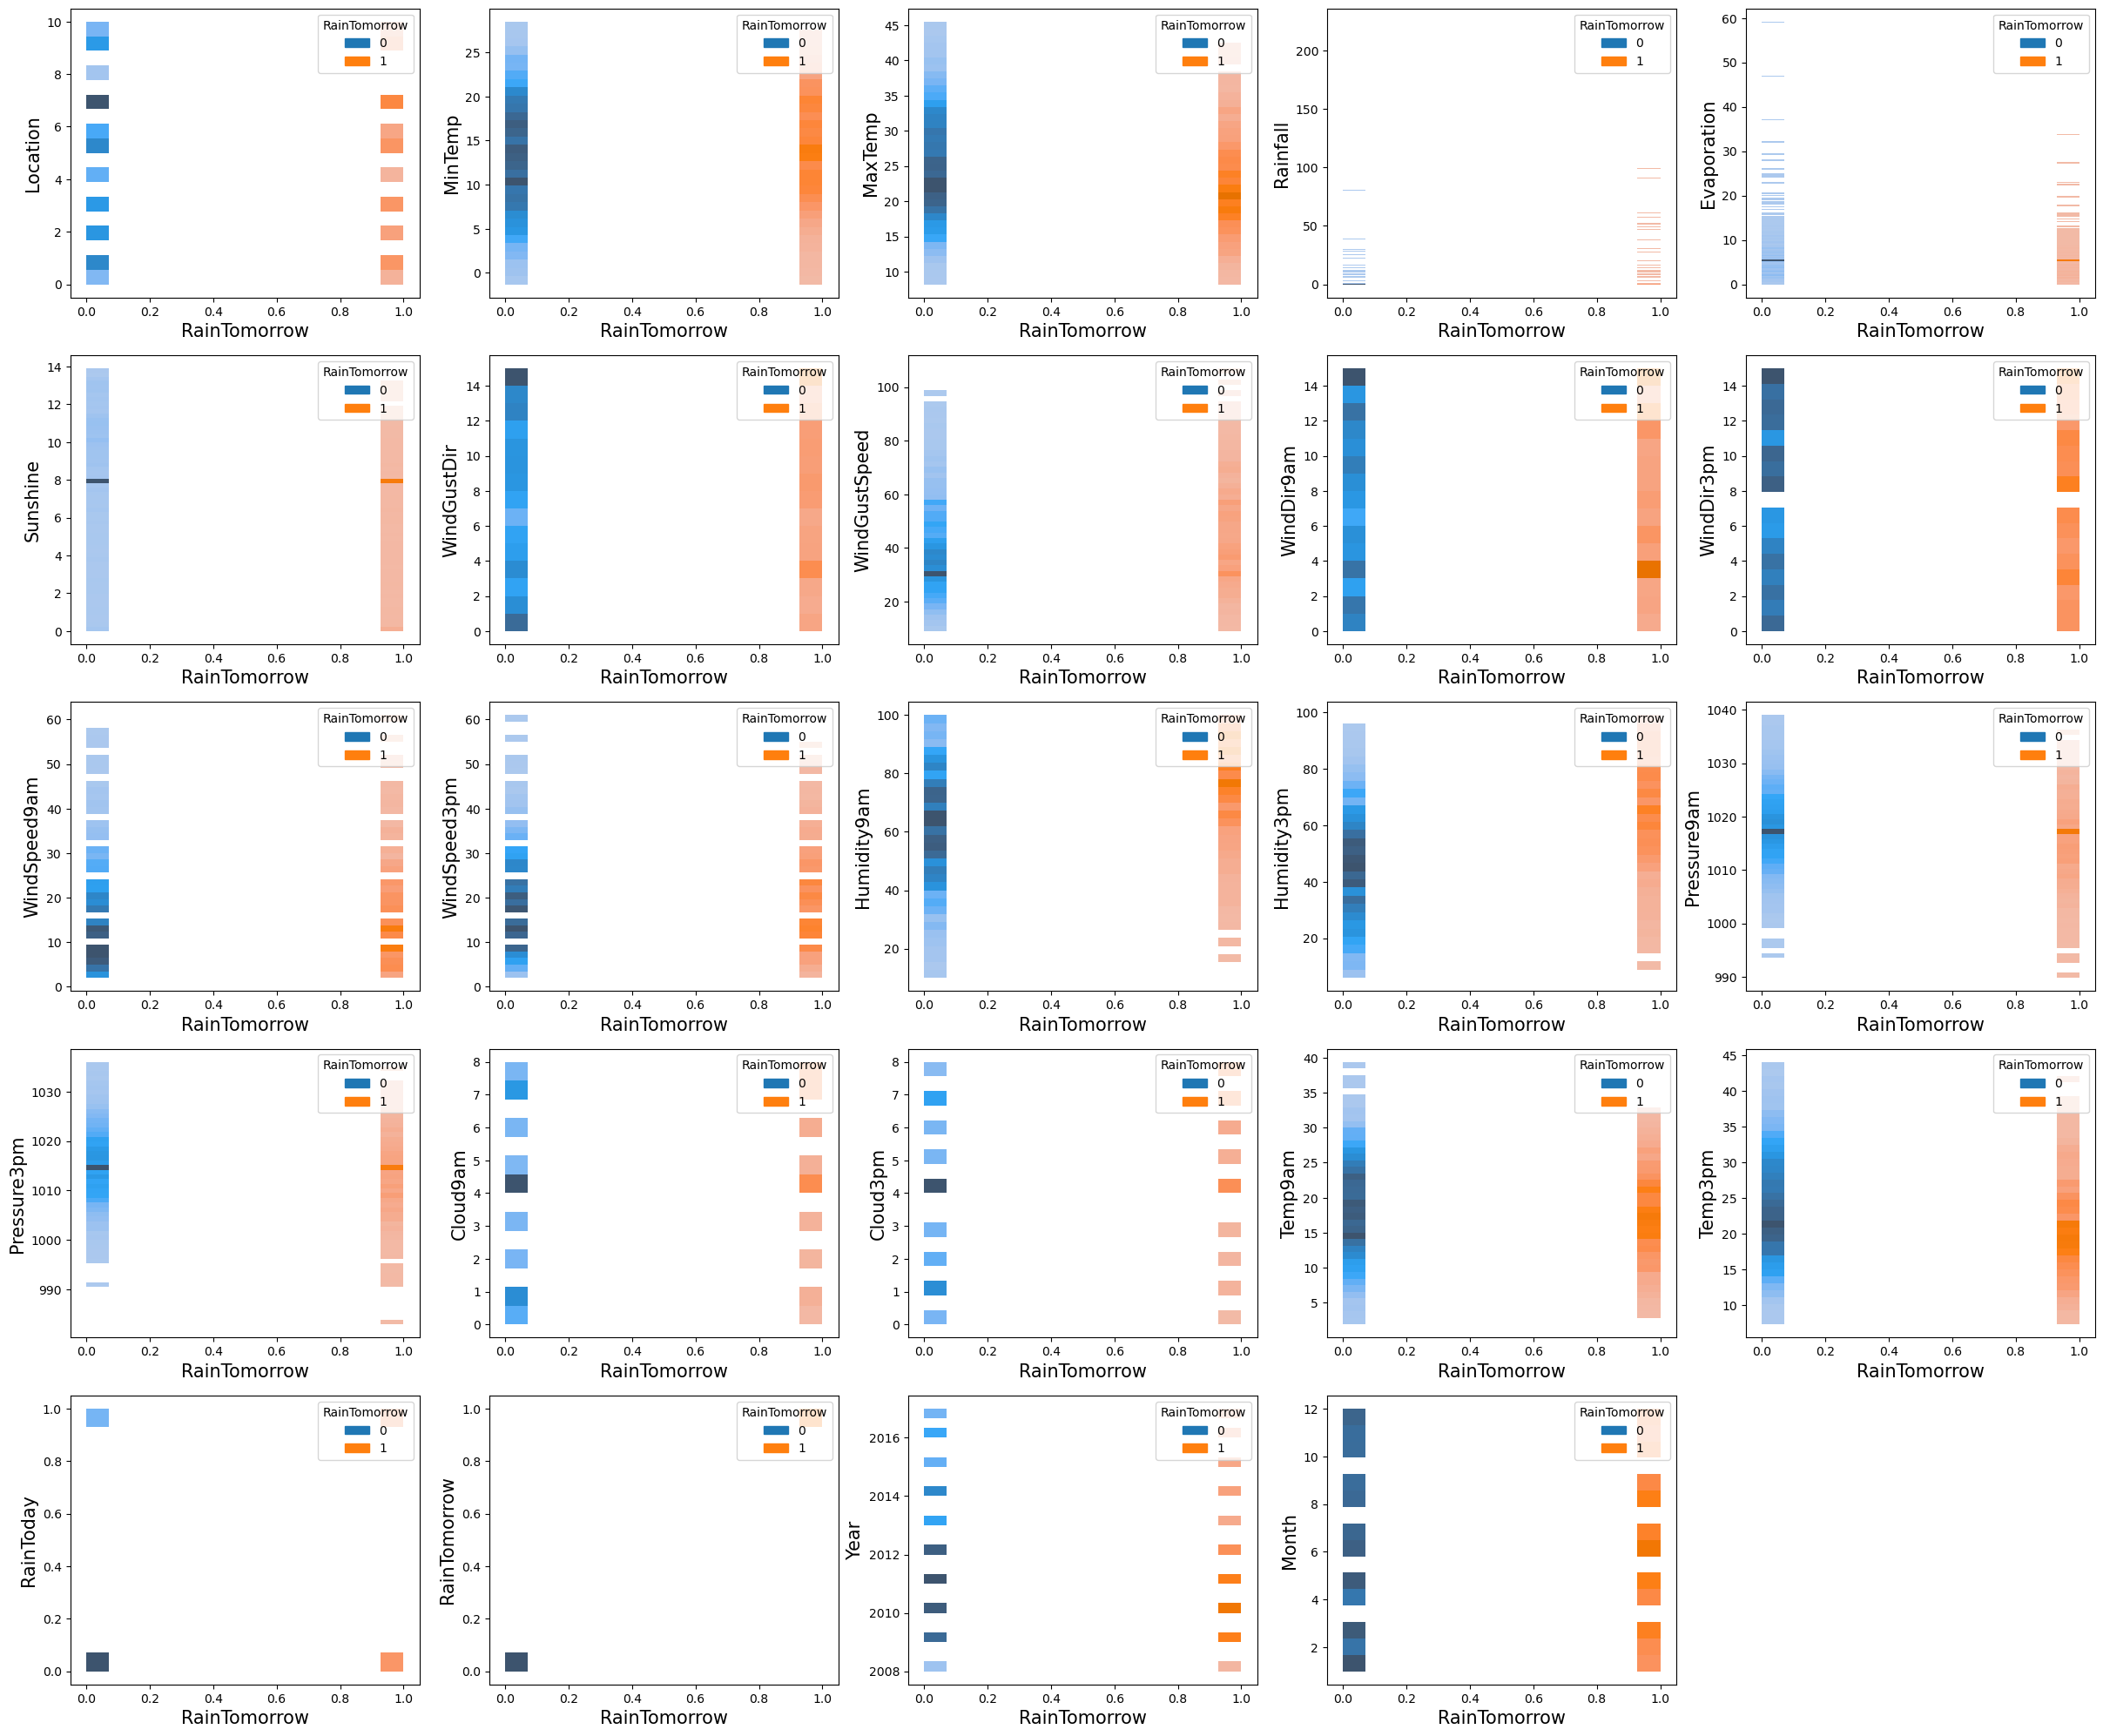

In [37]:
# check feature and label relationship usning histplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.histplot(data=df,x='RainTomorrow',y=i,hue='RainTomorrow')
        plt.ylabel(i,fontsize=15)
        plt.xlabel('RainTomorrow',fontsize=15)
    plotnumber+=1
plt.show()

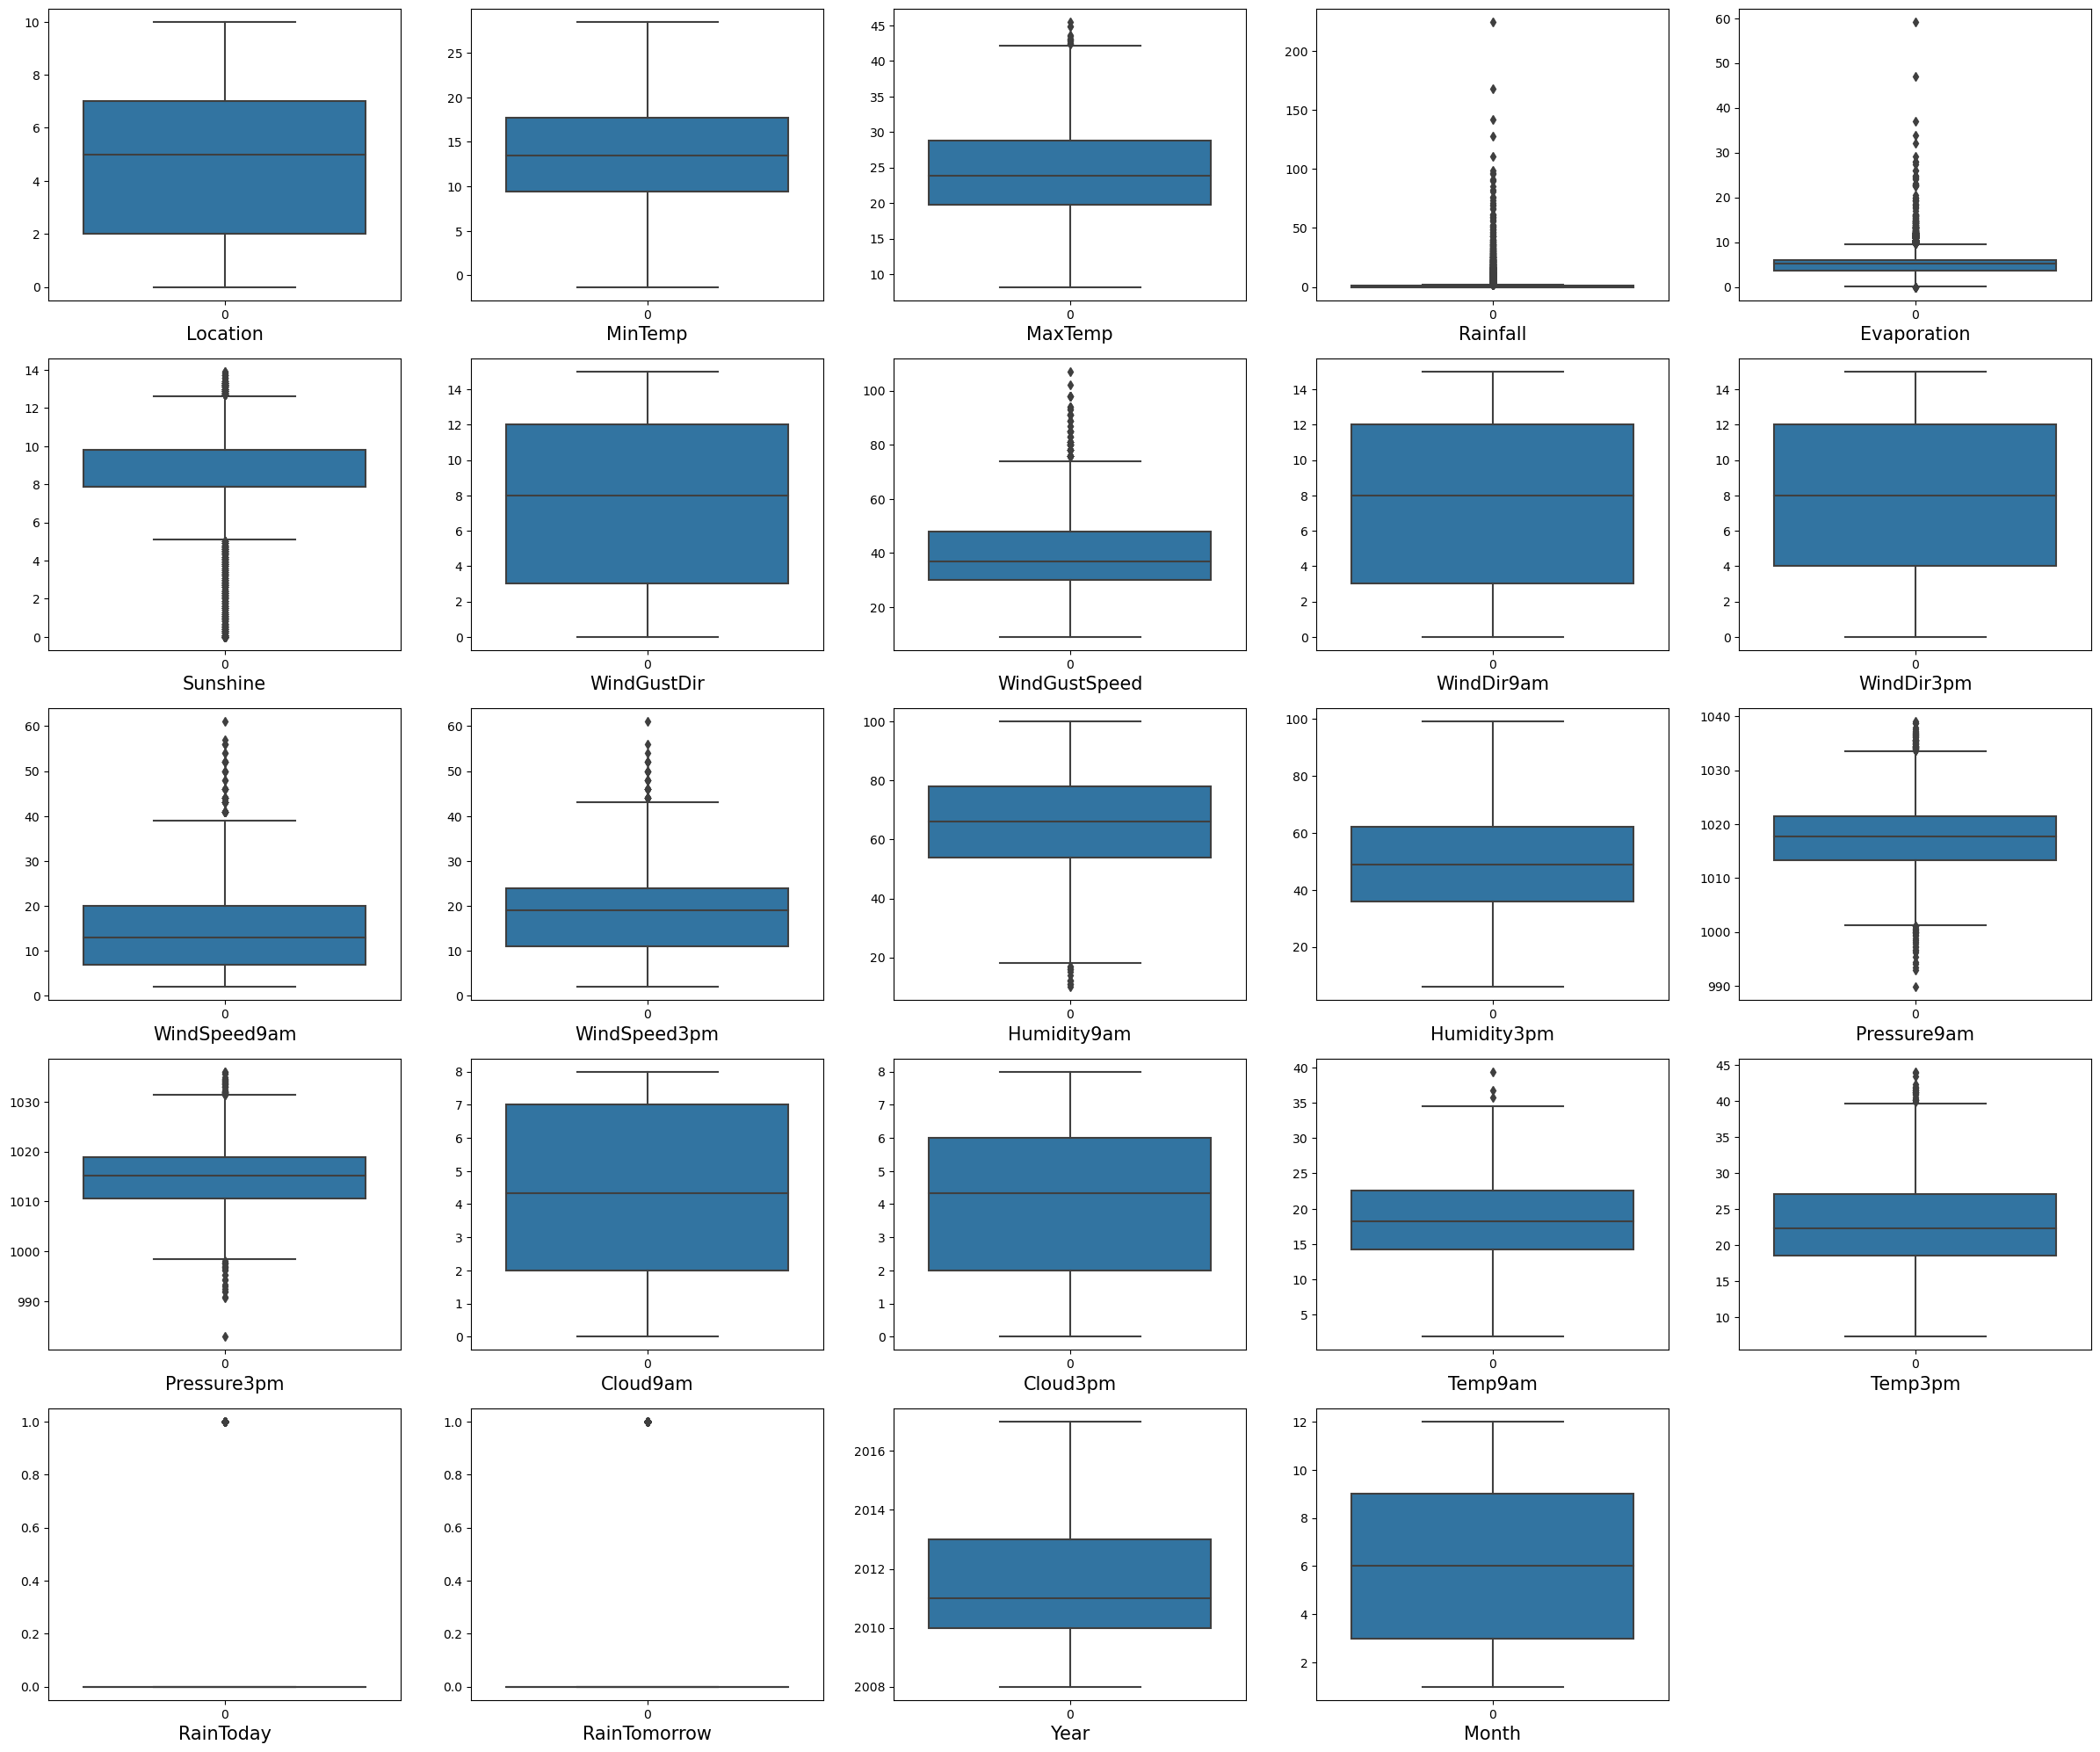

In [38]:
# check outlier usning boxplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        
    plotnumber+=1
plt.show()

In [39]:
# we keep outlier usning normalized form usning powertransfomer 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [40]:
df['MaxTemp'] = pt.fit_transform(df[['MaxTemp']])
df['Evaporation'] = pt.fit_transform(df[['Evaporation']])
df['Sunshine'] = pt.fit_transform(df[['Sunshine']])
df['WindGustSpeed'] = pt.fit_transform(df[['WindGustSpeed']])
df['WindSpeed9am'] = pt.fit_transform(df[['WindSpeed9am']])
df['WindSpeed3pm'] = pt.fit_transform(df[['WindSpeed3pm']])
df['Humidity9am'] = pt.fit_transform(df[['Humidity9am']])
df['Pressure9am'] = pt.fit_transform(df[['Pressure9am']])
df['Pressure3pm'] = pt.fit_transform(df[['Pressure3pm']])
df['Temp3pm'] = pt.fit_transform(df[['Temp3pm']])


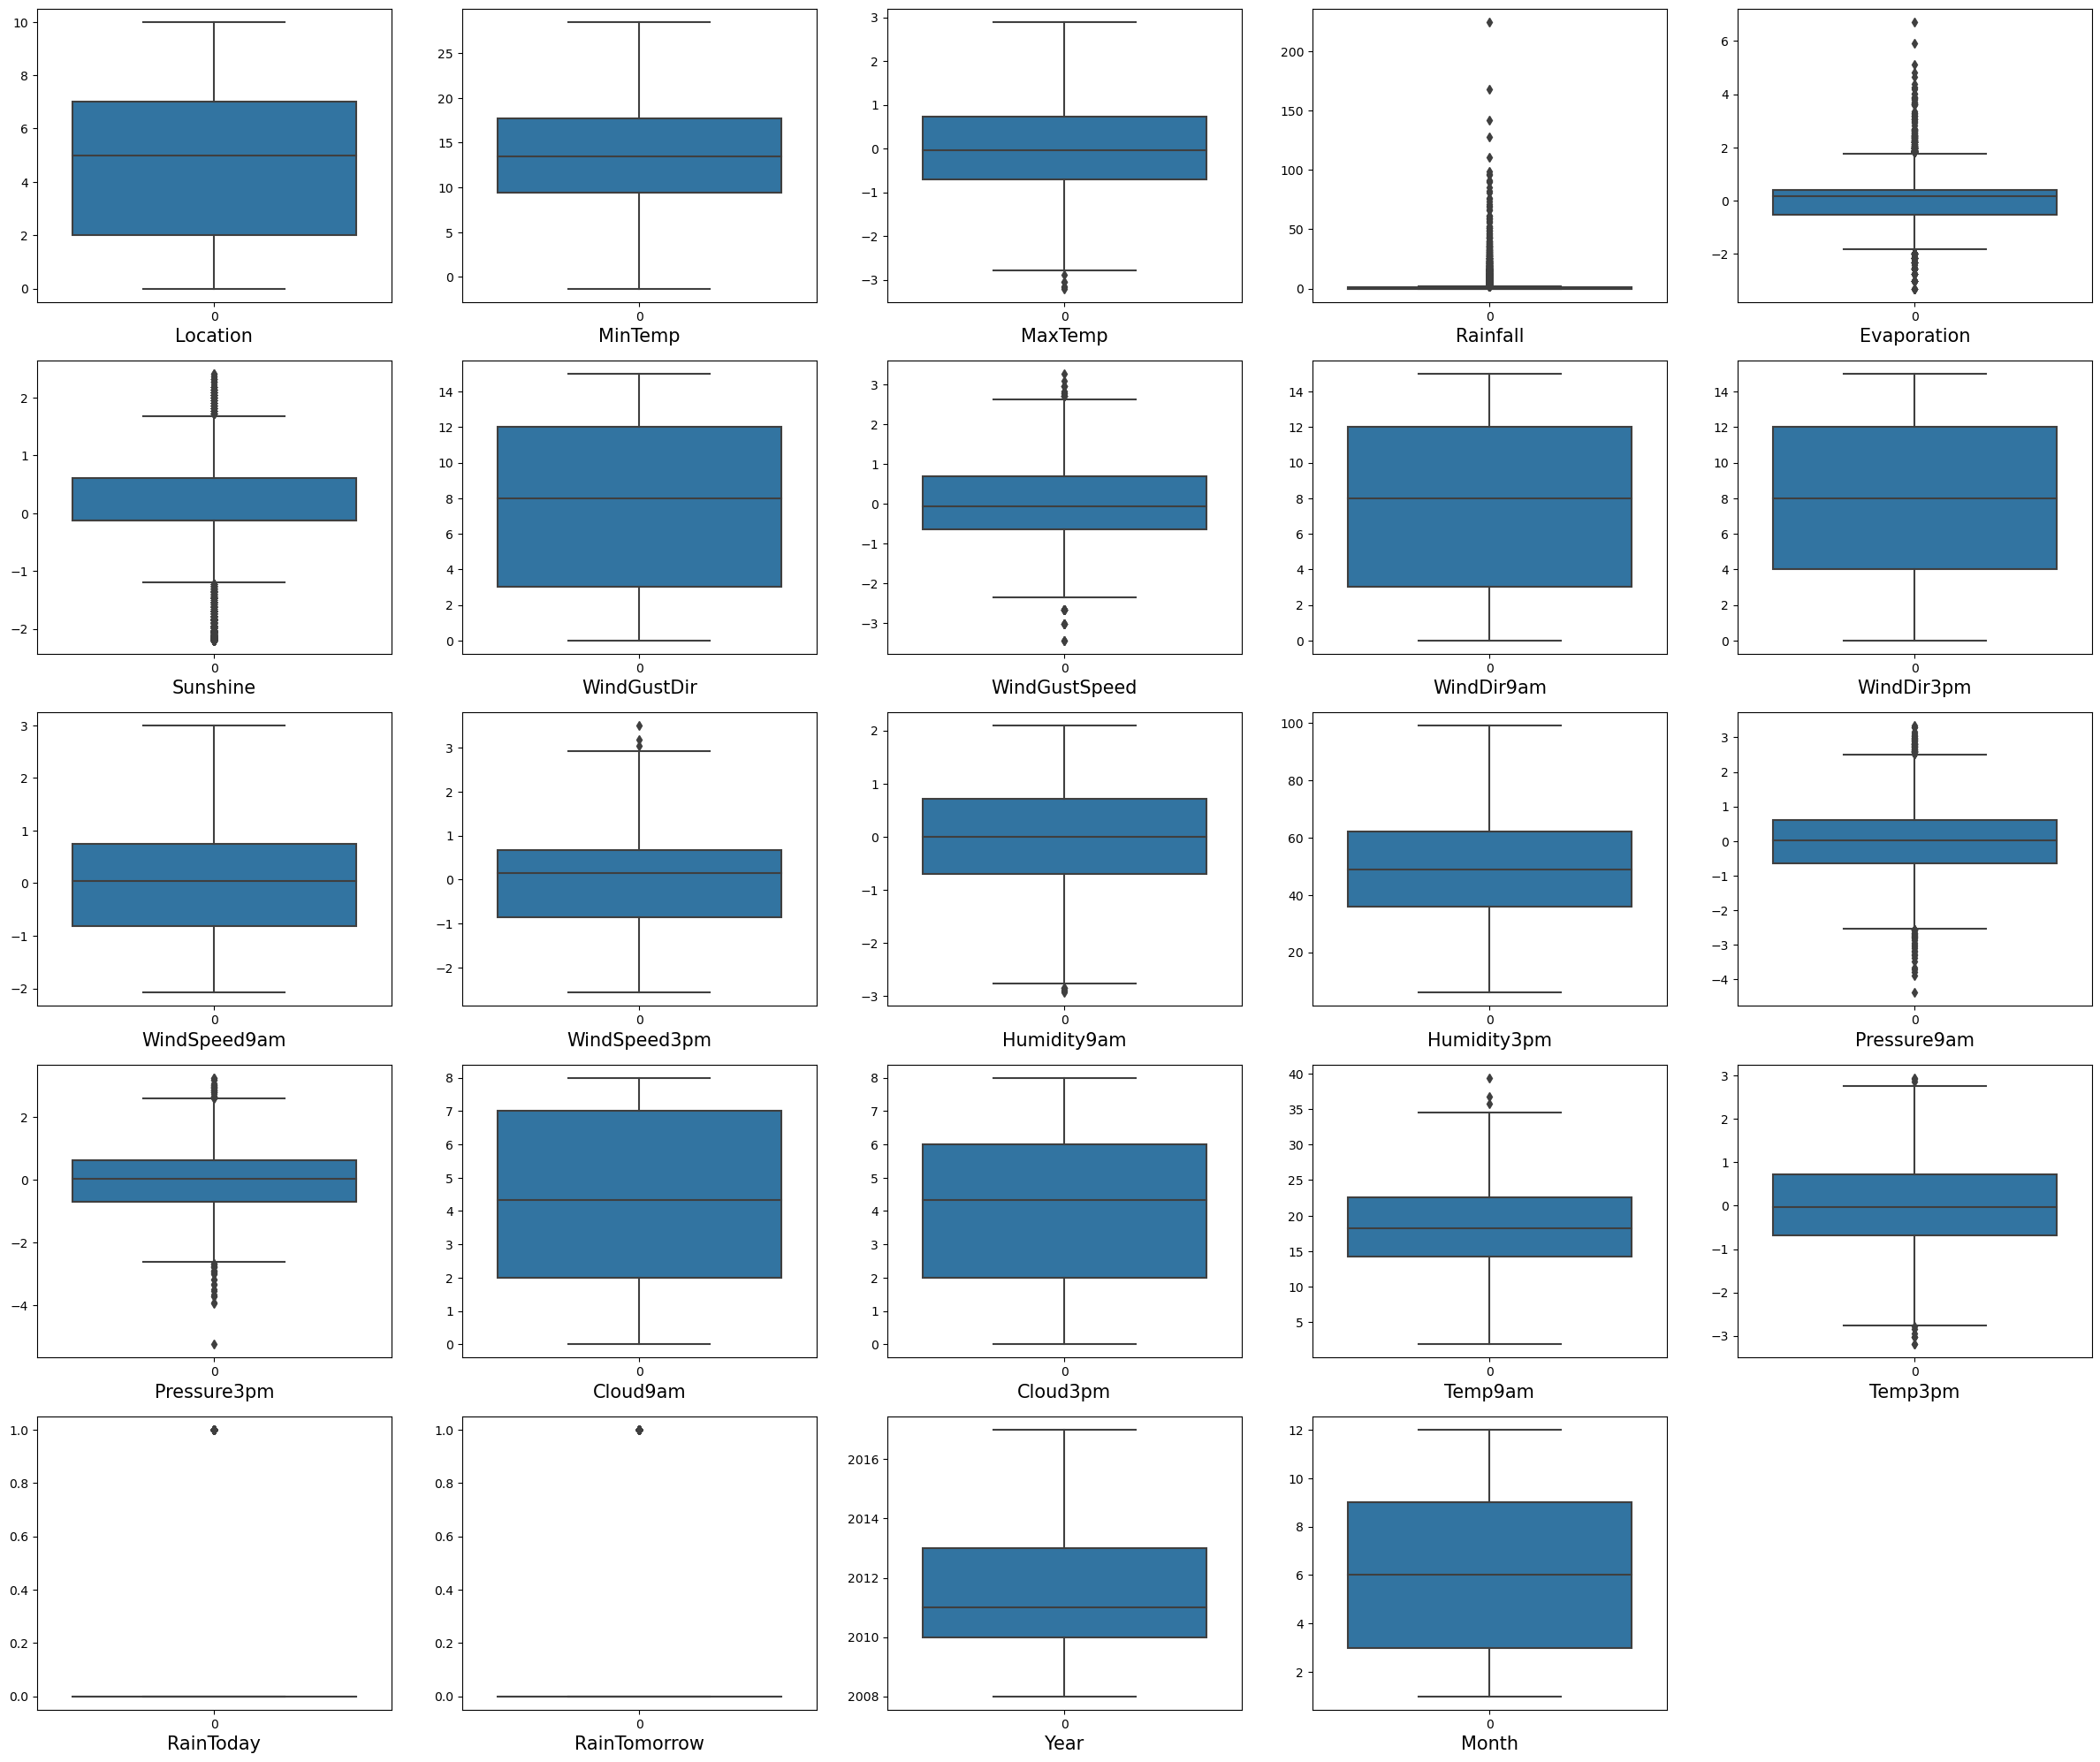

In [41]:
# check outlier 
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        
    plotnumber+=1
plt.show()

outlier present in maxtemp, evaporation,sunshine,pressure3pm,pressure9am windgustspeed and temp3pm we delect oulier usning IQR method

In [42]:
max_temp_iqr = df['MaxTemp'].quantile(0.75) - df['MaxTemp'].quantile(0.25)
max_low = df['MaxTemp'].quantile(0.25) - (1.5 * max_temp_iqr)
max_index = np.where(df['MaxTemp']<max_low)
df.drop(df.index[max_index],inplace=True)

In [43]:
Eva_iqr = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)
eva_high = df['Evaporation'].quantile(0.75) + (1.5 * Eva_iqr)
eva_index = np.where(df['Evaporation']>eva_high)
df.drop(df.index[eva_index],inplace=True)

In [44]:
eva_low = df['Evaporation'].quantile(0.25) - (1.5 * Eva_iqr)
Eva_index = np.where(df['Evaporation']<eva_low)
df.drop(df.index[Eva_index],inplace=True)

In [45]:
sun_iqr = df['Sunshine'].quantile(0.75) - df['Sunshine'].quantile(0.25)
sun_high = df['Sunshine'].quantile(0.75) + (1.5 * sun_iqr)
eva_index = np.where(df['Sunshine']>sun_high)
df.drop(df.index[eva_index],inplace=True)

In [46]:
sun_low = df['Sunshine'].quantile(0.25) - (1.5 * sun_iqr)
Sun_index = np.where(df['Sunshine']<sun_low)
df.drop(df.index[Sun_index],inplace=True)

In [47]:
wind_iqr = df['WindGustSpeed'].quantile(0.75) - df['WindGustSpeed'].quantile(0.25)
wind_high = df['WindGustSpeed'].quantile(0.75) + (1.5 * wind_iqr)
wind_index = np.where(df['WindGustSpeed']>wind_high)
df.drop(df.index[wind_index],inplace=True)

In [48]:
wind_low = df['WindGustSpeed'].quantile(0.25) - (1.5 * wind_iqr)
Wind_index = np.where(df['WindGustSpeed']<wind_low)
df.drop(df.index[Wind_index],inplace=True)

In [49]:
hum_iqr = df['Humidity9am'].quantile(0.75) - df['Humidity9am'].quantile(0.25)
hum_low = df['Humidity9am'].quantile(0.25) - (1.5 * hum_iqr)
hum_index = np.where(df['Humidity9am']<hum_low)
df.drop(df.index[hum_index],inplace=True)

In [50]:
pre_iqr = df['Pressure9am'].quantile(0.75) - df['Pressure9am'].quantile(0.25)
pre_high = df['Pressure9am'].quantile(0.75) + (1.5 * pre_iqr)
pre_index = np.where(df['Pressure9am']>pre_high)
df.drop(df.index[pre_index],inplace=True)

In [51]:
pre_low = df['Pressure9am'].quantile(0.25) - (1.5 * pre_iqr)
Pre_index = np.where(df['Pressure9am']<pre_low)
df.drop(df.index[pre_index],inplace=True)

In [52]:
pres_iqr = df['Pressure3pm'].quantile(0.75) - df['Pressure3pm'].quantile(0.25)
pres_high = df['Pressure3pm'].quantile(0.75) + (1.5 * pres_iqr)
pres_index = np.where(df['Pressure3pm']>pres_high)
df.drop(df.index[pres_index],inplace=True)

In [53]:
pres_low = df['Pressure3pm'].quantile(0.25) - (1.5 * pres_iqr)
Pres_index = np.where(df['Pressure3pm']<pres_low)
df.drop(df.index[Pres_index],inplace=True)

In [54]:
temp_iqr = df['Temp9am'].quantile(0.75) - df['Temp9am'].quantile(0.25)
temp_high = df['Temp9am'].quantile(0.75) + (1.5 * temp_iqr)
temp_index = np.where(df['Temp9am']>temp_high)
df.drop(df.index[temp_index],inplace=True)
                                                                

In [55]:
t_iqr = df['Temp3pm'].quantile(0.75) - df['Temp3pm'].quantile(0.25)
t_high = df['Temp3pm'].quantile(0.75) + (1.5 * t_iqr)
t_index = np.where(df['Temp3pm']>t_high)
df.drop(df.index[t_index],inplace=True)

In [56]:
t_low = df['Temp3pm'].quantile(0.25) - (1.5 * t_iqr)
T_index = np.where(df['Temp3pm']<t_low)
df.drop(df.index[T_index],inplace=True)

In [57]:
df.reset_index()

index  Location  MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0         0         1     13.4 -0.173637       0.6     0.170172  -0.11838   
1         1         1      7.4  0.179791       0.0     0.170172  -0.11838   
2         2         1     12.9  0.273405       0.0     0.170172  -0.11838   
3         3         1      9.2  0.622278       0.0     0.170172  -0.11838   
4         4         1     17.5  1.237079       1.0     0.170172  -0.11838   
...     ...       ...      ...       ...       ...          ...       ...   
3906   8419         8      3.5 -0.356849       0.0     0.170172  -0.11838   
3907   8420         8      2.8 -0.091842       0.0     0.170172  -0.11838   
3908   8421         8      3.6  0.211121       0.0     0.170172  -0.11838   
3909   8422         8      5.4  0.457335       0.0     0.170172  -0.11838   
3910   8423         8      7.8  0.472471       0.0     0.170172  -0.11838   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0              13       0.425131          13  ...    -1.527735    -1.243513   
1              14       0.425131           6  ...    -1.070475    -1.131110   
2              15       0.554813          13  ...    -1.543527    -0.986843   
3               4      -1.222602           9  ...     0.027495    -0.333155   
4              13       0.221654           1  ...    -1.038991    -1.420489   
...           ...            ...         ...  ...          ...          ...   
3906            0      -0.553840           2  ...     1.132923     0.988271   
3907            0      -0.553840           9  ...     1.117410     0.847823   
3908            6      -1.441211           9  ...     0.946667     0.660138   
3909            3      -0.068624           9  ...     0.557881     0.299060   
3910            9      -0.824442          10  ...     0.308524     0.251832   

      Cloud9am  Cloud3pm  Temp9am   Temp3pm  RainToday  RainTomorrow  Year  \
0     8.000000  4.320988     16.9 -0.123797          0             0  2008   
1     4.336806  4.320988     17.2  0.284029          0             0  2008   
2     4.336806  2.000000     21.0  0.107340          0             0  2008   
3     4.336806  4.320988     18.1  0.625611          0             0  2008   
4     7.000000  8.000000     17.8  1.097608          0             0  2008   
...        ...       ...      ...       ...        ...           ...   ...   
3906  4.336806  4.320988      9.4 -0.276370          0             0  2017   
3907  4.336806  4.320988     10.1 -0.023845          0             0  2017   
3908  4.336806  4.320988     10.9  0.315716          0             0  2017   
3909  4.336806  4.320988     12.5  0.564610          0             0  2017   
3910  3.000000  2.000000     15.1  0.549286          0             0  2017   

      Month  
0        12  
1        12  
2        12  
3        12  
4        12  
...     ...  
3906      6  
3907      6  
3908      6  
3909      6  
3910      6  

[3911 rows x 25 columns]

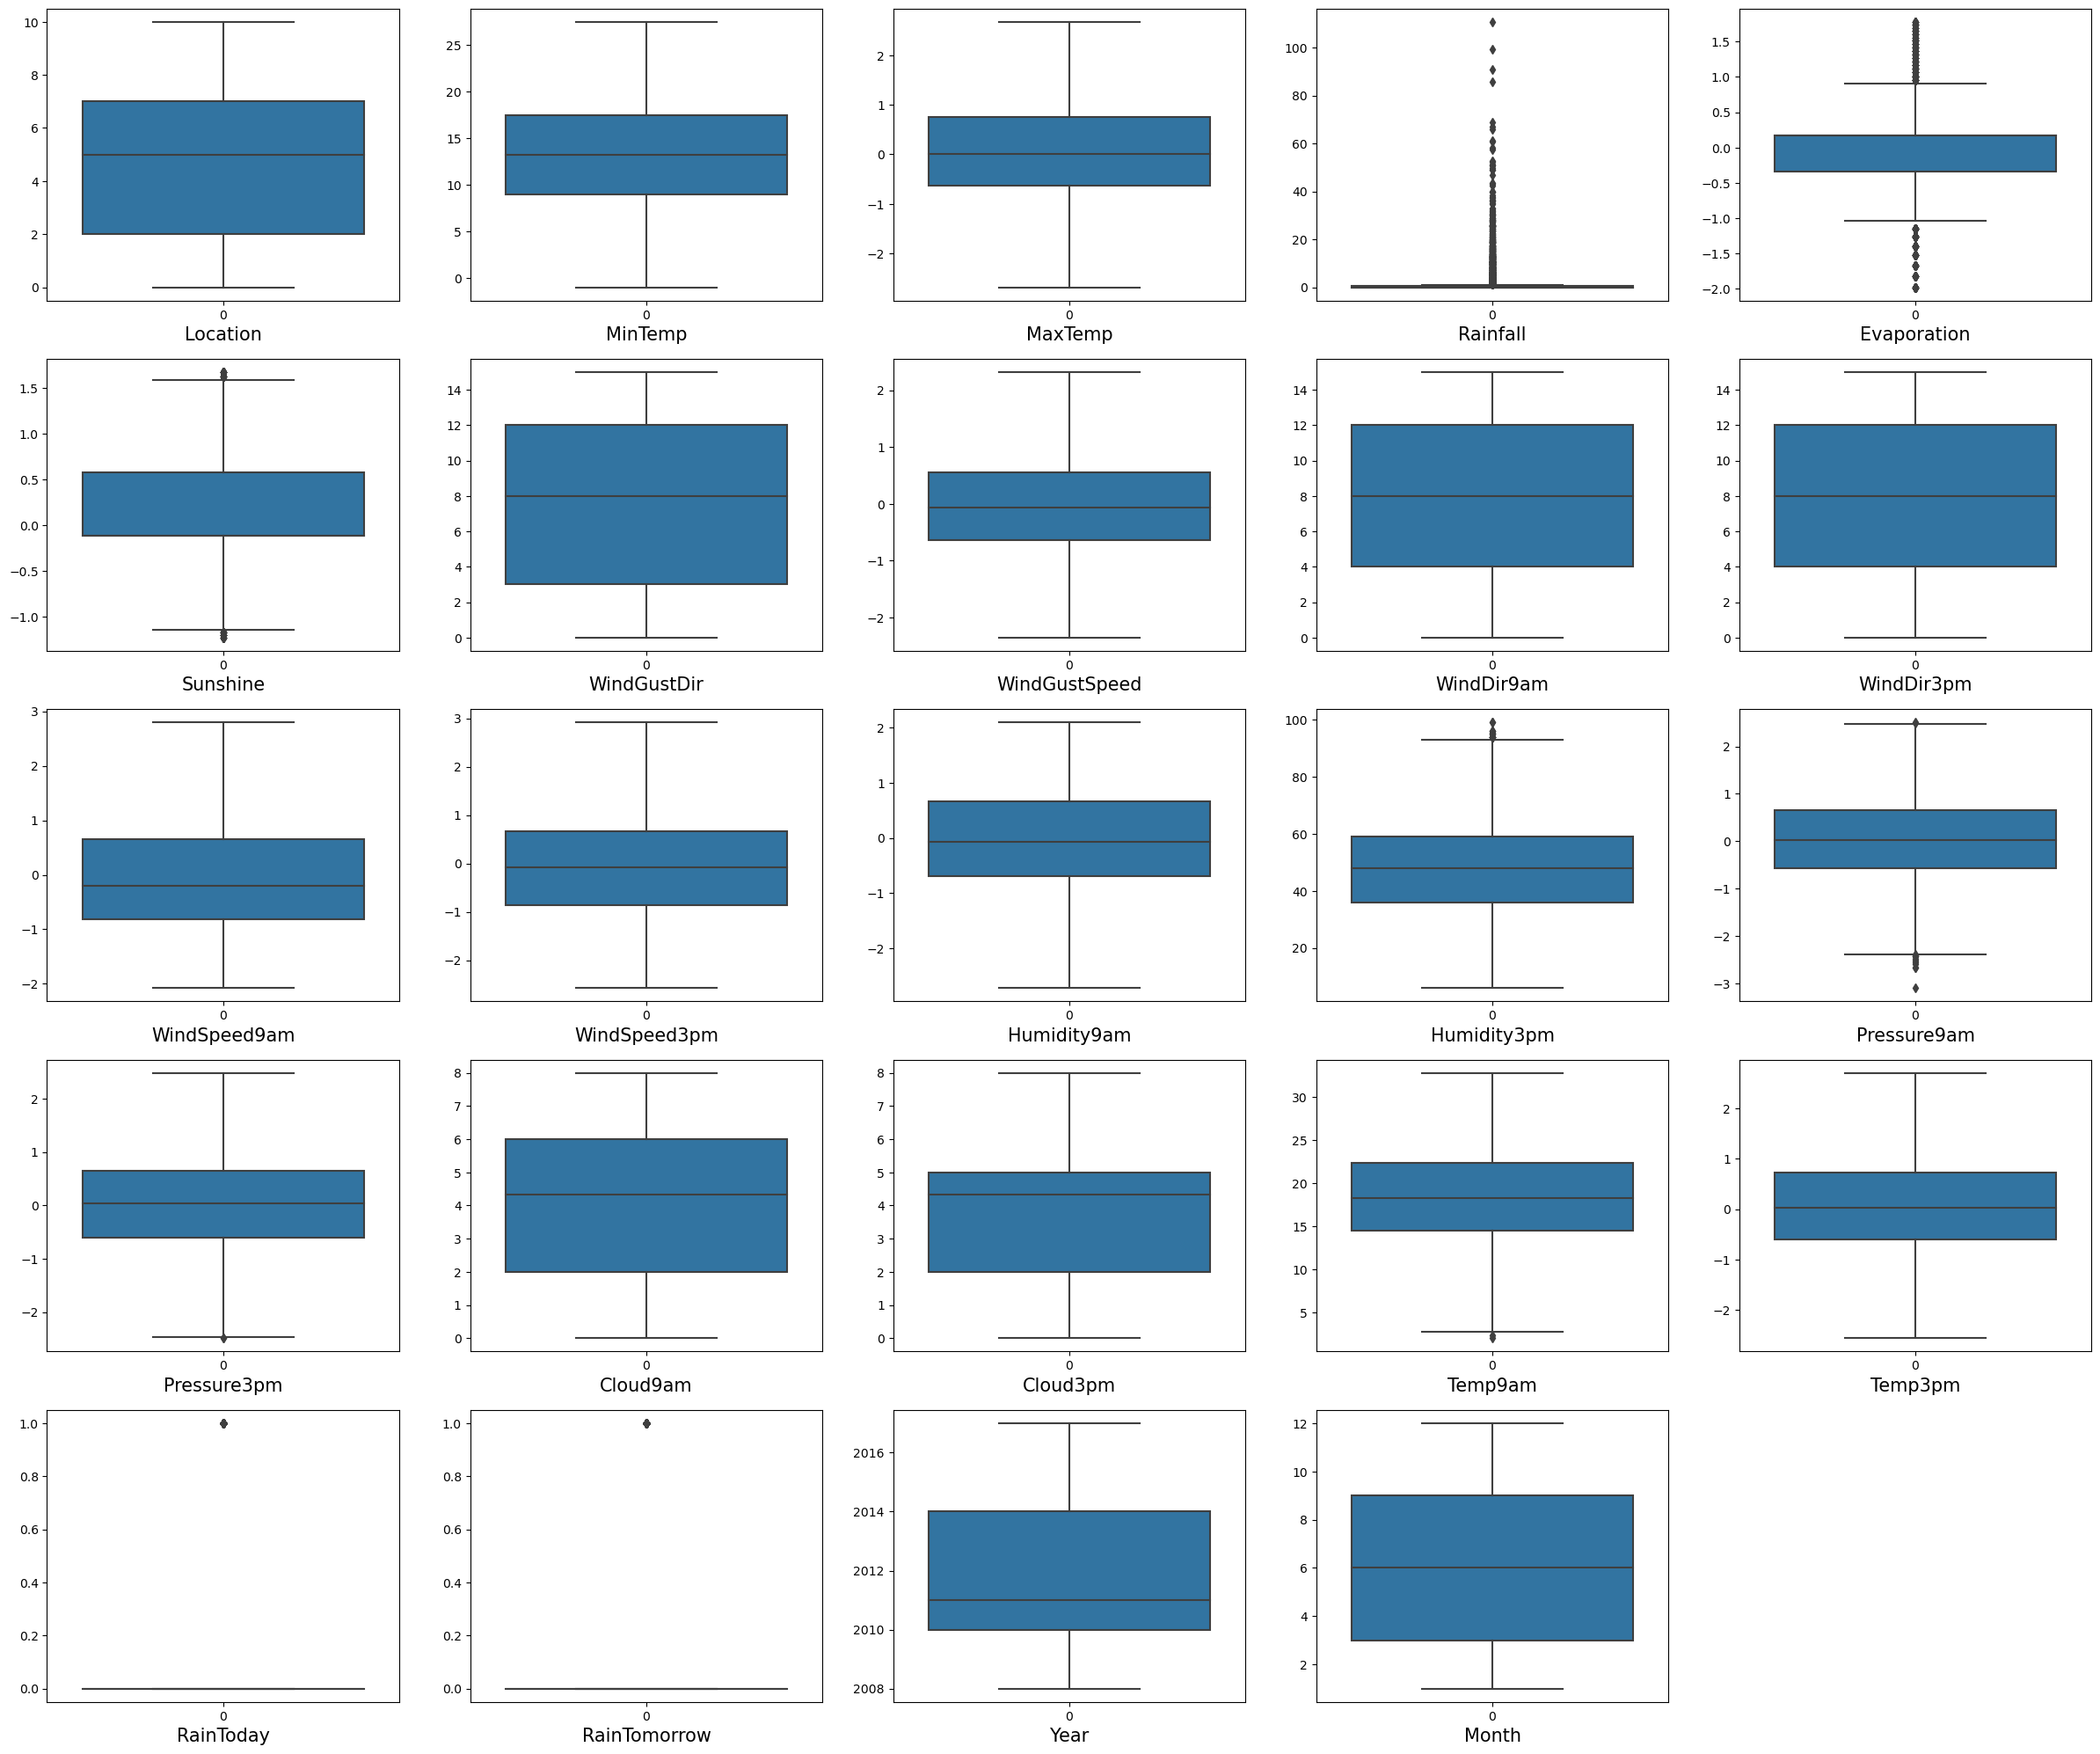

In [58]:

plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        
    plotnumber+=1
plt.show()

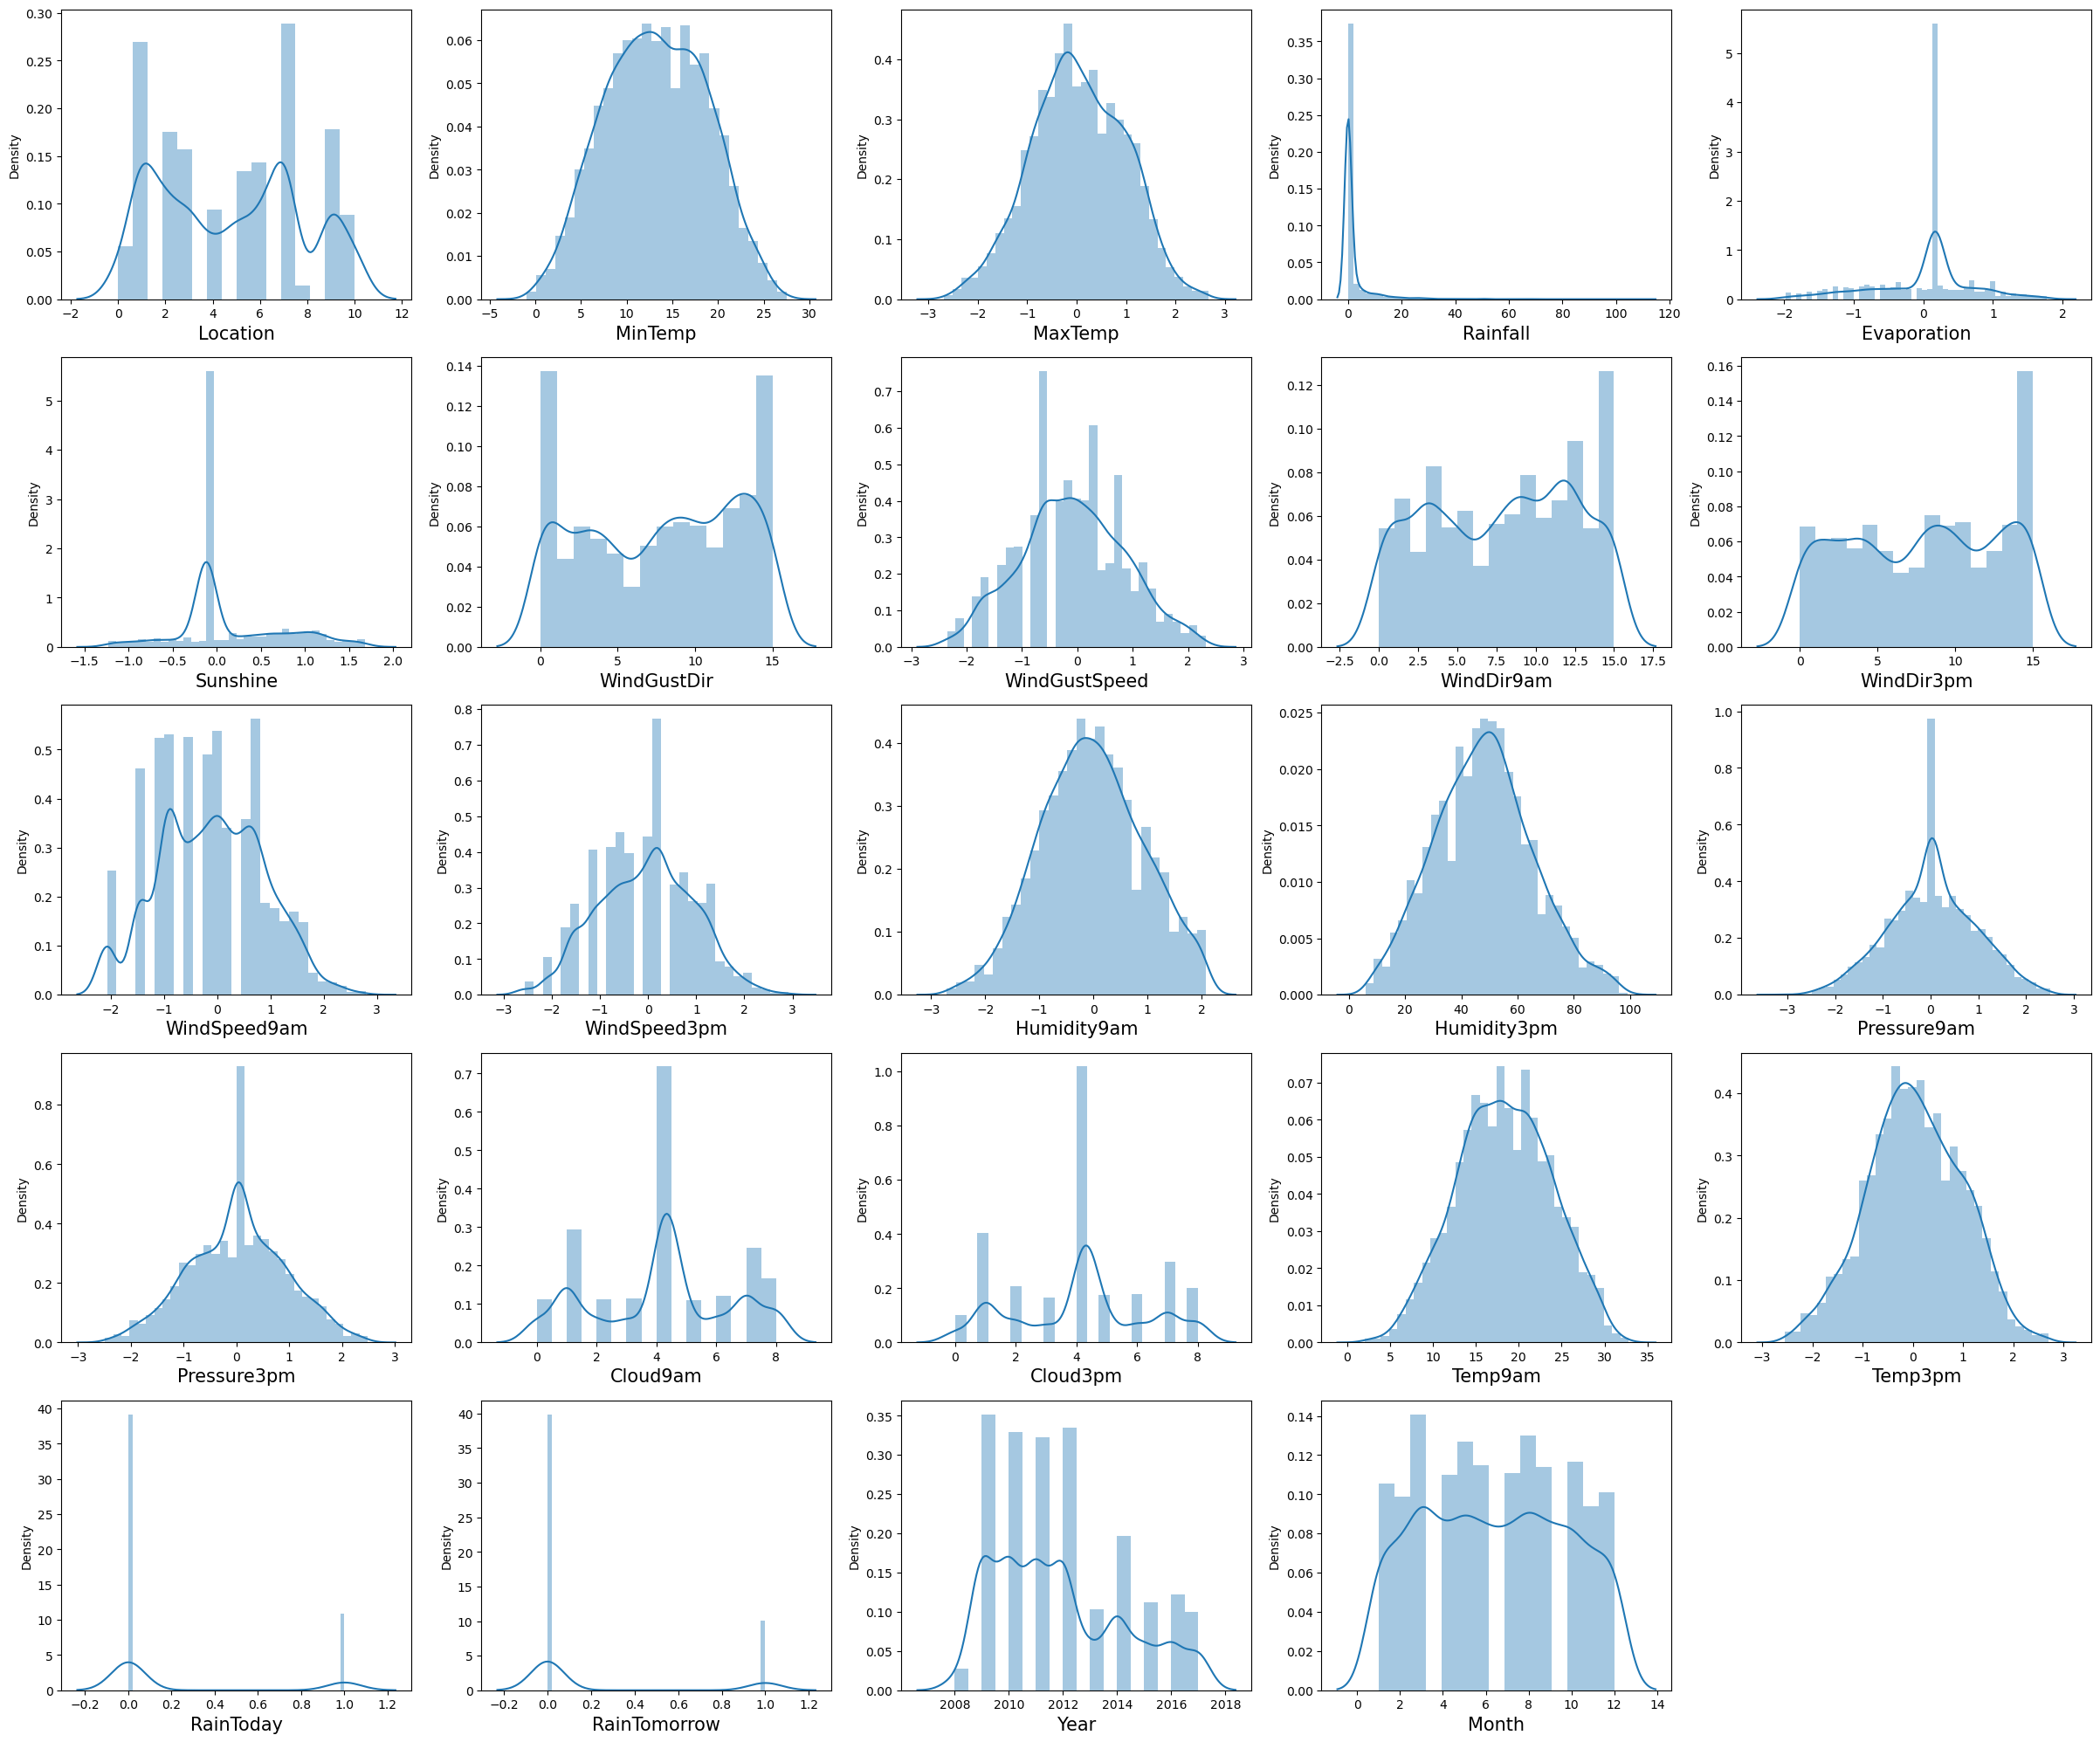

In [59]:
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [60]:
# seprate feature and label
x = df.drop(['RainTomorrow','Rainfall'],axis=1)
y = df['RainTomorrow']

In [61]:
# check feature and label relationship
x.corrwith(y)

Location         0.028425
MinTemp          0.080941
MaxTemp         -0.138788
Evaporation     -0.030259
Sunshine        -0.262739
WindGustDir      0.059182
WindGustSpeed    0.188403
WindDir9am       0.036084
WindDir3pm      -0.014117
WindSpeed9am     0.051969
WindSpeed3pm     0.058725
Humidity9am      0.287179
Humidity3pm      0.429488
Pressure9am     -0.155992
Pressure3pm     -0.127922
Cloud9am         0.226585
Cloud3pm         0.290886
Temp9am         -0.025056
Temp3pm         -0.183404
RainToday        0.314170
Year             0.013269
Month            0.004212
dtype: float64

<Axes: >

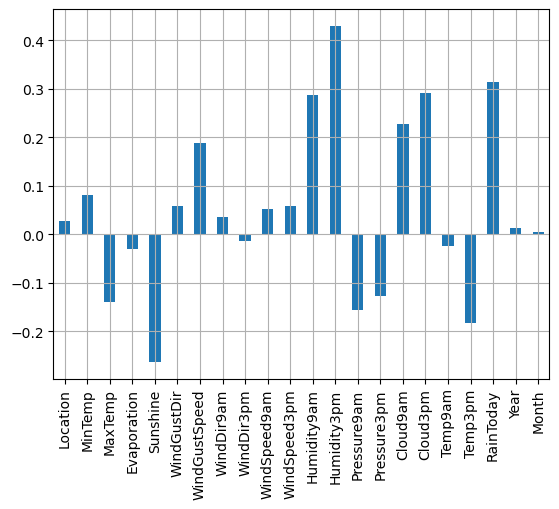

In [62]:
# check feature and label realtionship usning graph
x.corrwith(y).plot(kind='bar',grid=True)

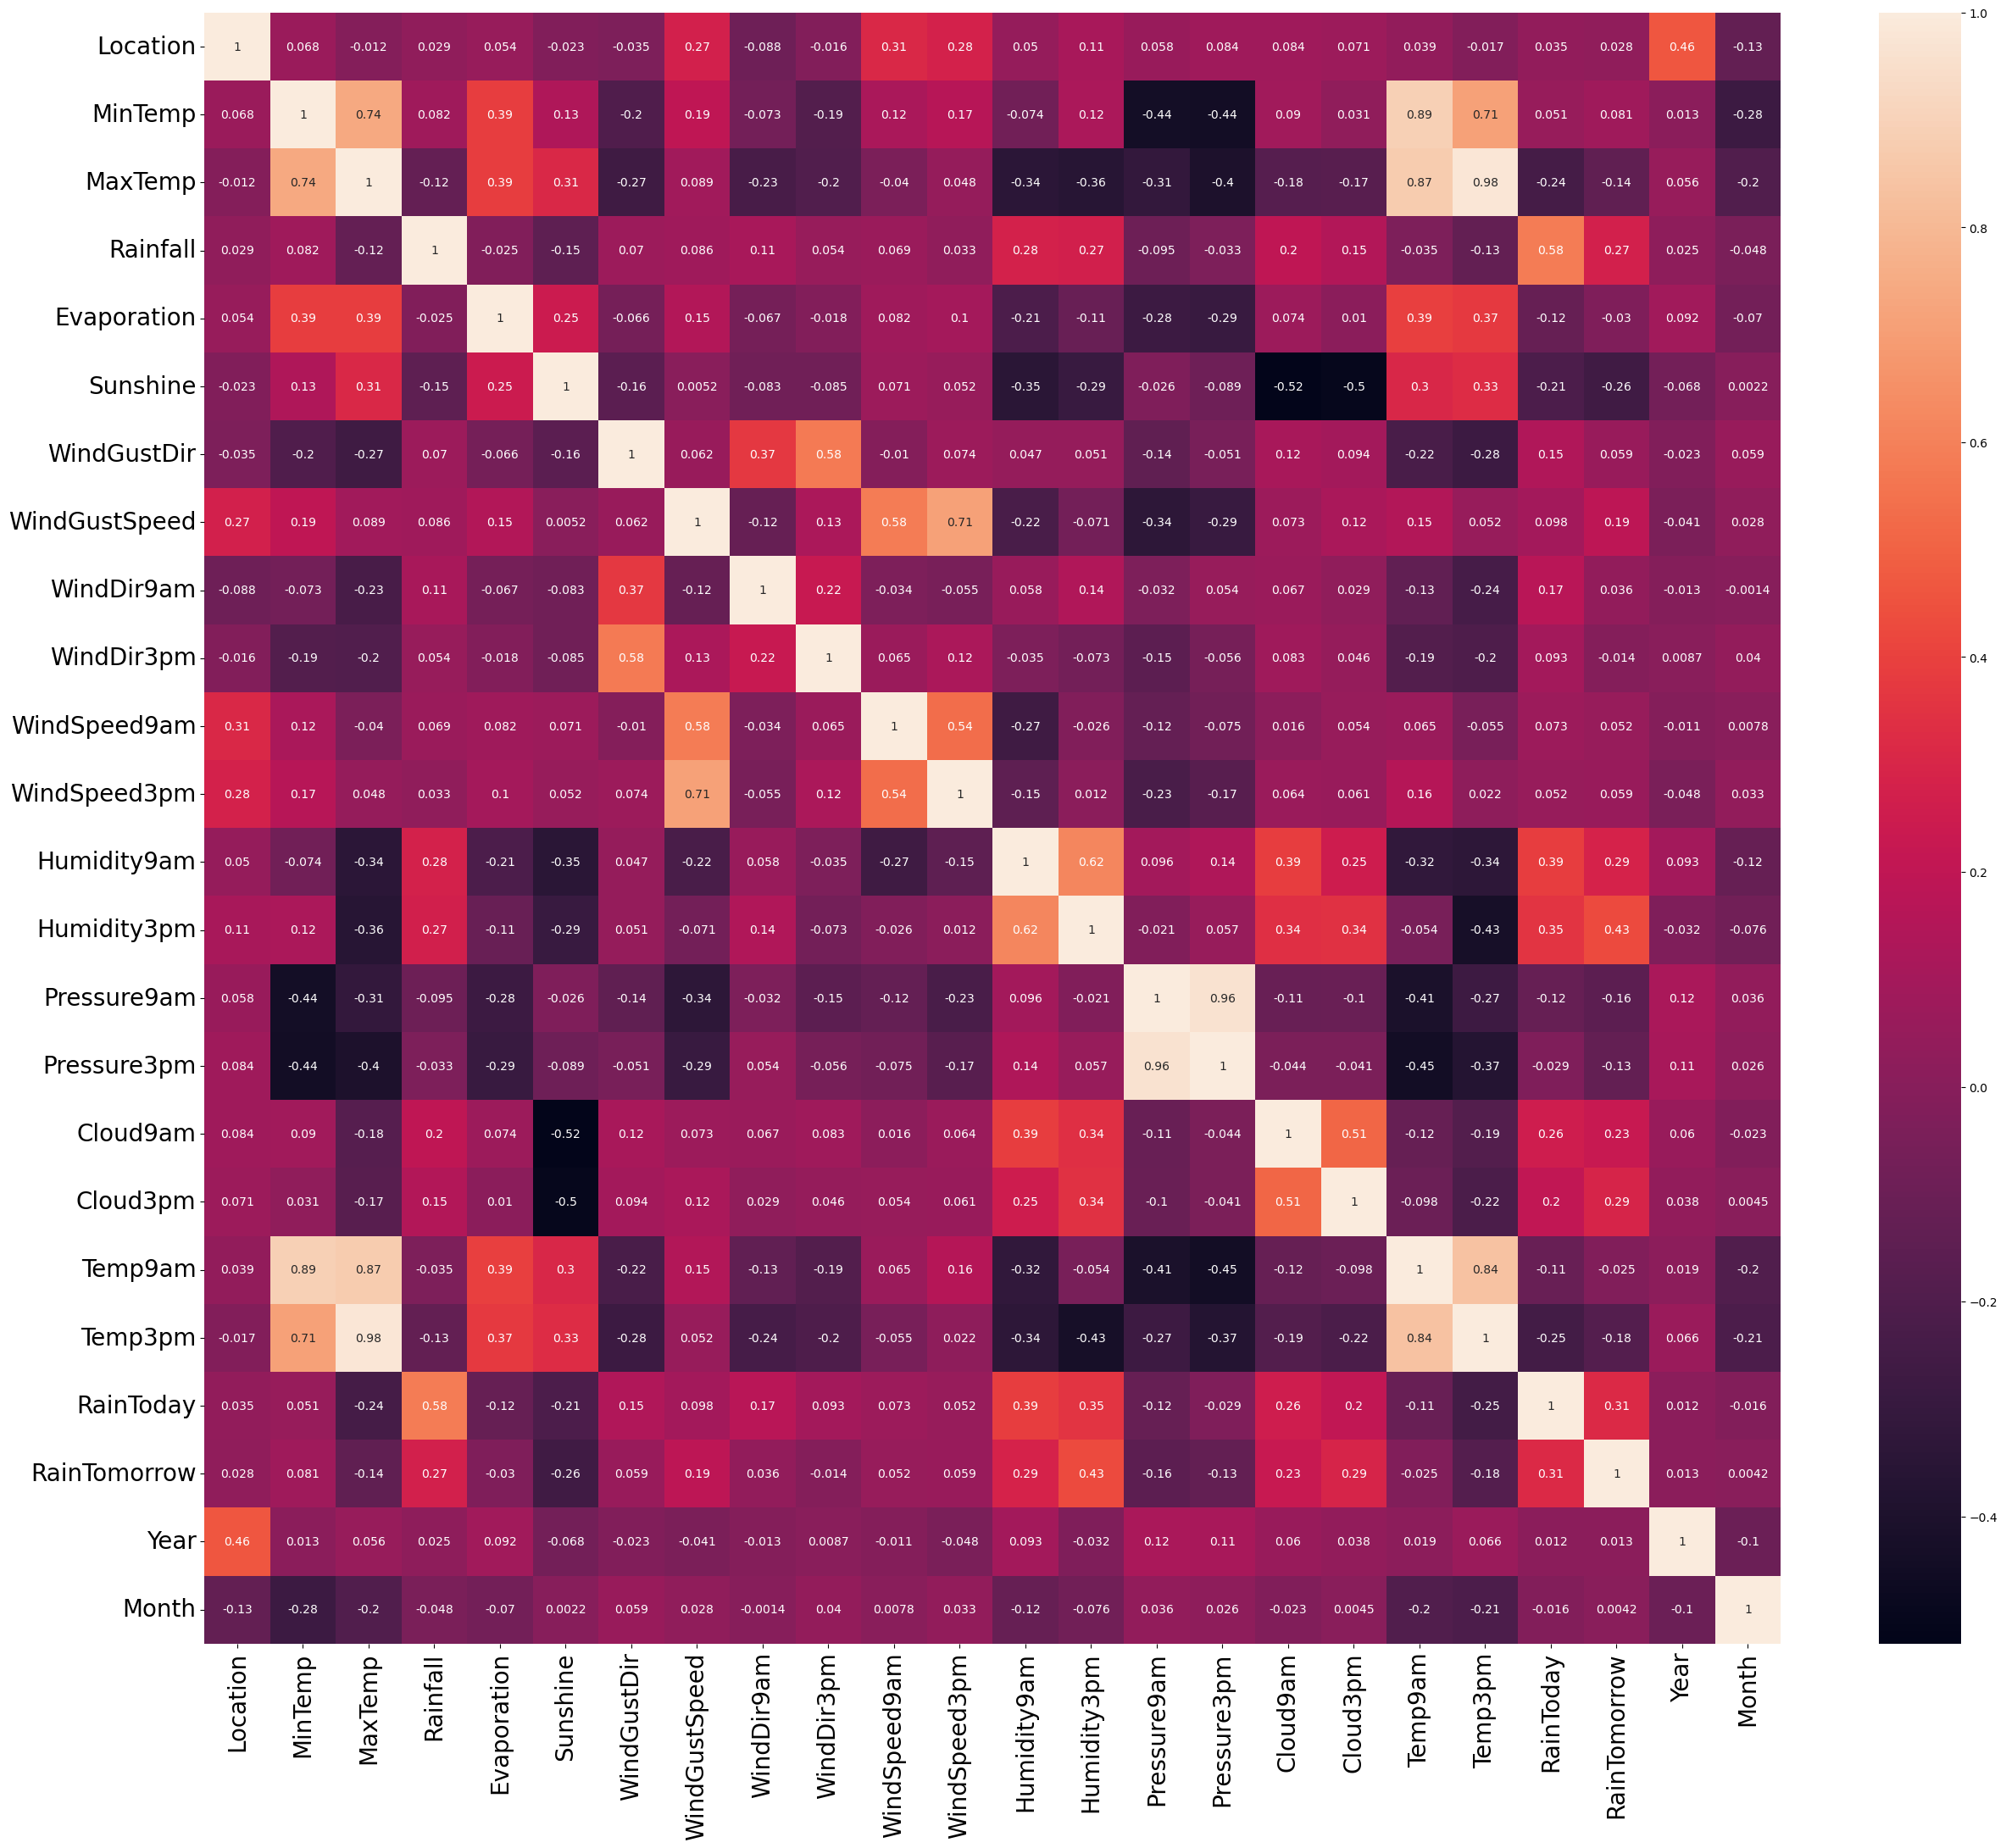

In [63]:
# check multicolinearity problem usning heatmap
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [64]:
# check multicolinearity score using vif method
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
scaled = StandardScaler()
scal = pd.DataFrame(scaled.fit_transform(x),columns=x.columns)

In [66]:
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

vif        feature
0    1.631955       Location
1    8.827655        MinTemp
2   36.888920        MaxTemp
3    1.417579    Evaporation
4    1.870469       Sunshine
5    1.751152    WindGustDir
6    2.808364  WindGustSpeed
7    1.324379     WindDir9am
8    1.679899     WindDir3pm
9    1.948790   WindSpeed9am
10   2.348237   WindSpeed3pm
11   3.840831    Humidity9am
12   5.772110    Humidity3pm
13  20.365950    Pressure9am
14  19.195748    Pressure3pm
15   1.876845       Cloud9am
16   1.652404       Cloud3pm
17  17.852987        Temp9am
18  45.888224        Temp3pm
19   1.413207      RainToday
20   1.454392           Year
21   1.184677          Month

multicolinearity problem present in maxtemp,rainfall,pressure9am,pressure3pm,temp9am and temp3pm feature

In [67]:
# delect temp3pm feature and check again vif score
scal.drop('Temp3pm',axis=1,inplace=True)

In [68]:
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

vif        feature
0    1.626260       Location
1    8.761974        MinTemp
2   10.164551        MaxTemp
3    1.416995    Evaporation
4    1.870139       Sunshine
5    1.751042    WindGustDir
6    2.761284  WindGustSpeed
7    1.323777     WindDir9am
8    1.675983     WindDir3pm
9    1.945302   WindSpeed9am
10   2.347457   WindSpeed3pm
11   3.340778    Humidity9am
12   3.741401    Humidity3pm
13  19.756142    Pressure9am
14  18.767756    Pressure3pm
15   1.864486       Cloud9am
16   1.634892       Cloud3pm
17  16.654167        Temp9am
18   1.413194      RainToday
19   1.451088           Year
20   1.163566          Month

In [69]:
# delect preesure9am feature and agin check vif score
scal.drop('Pressure9am',axis=1,inplace=True)

In [70]:
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

vif        feature
0    1.625706       Location
1    8.660028        MinTemp
2    9.697727        MaxTemp
3    1.412667    Evaporation
4    1.862702       Sunshine
5    1.740522    WindGustDir
6    2.756536  WindGustSpeed
7    1.297925     WindDir9am
8    1.583104     WindDir3pm
9    1.944945   WindSpeed9am
10   2.339256   WindSpeed3pm
11   3.340410    Humidity9am
12   3.738876    Humidity3pm
13   1.500137    Pressure3pm
14   1.863208       Cloud9am
15   1.628288       Cloud3pm
16  16.530693        Temp9am
17   1.386672      RainToday
18   1.447953           Year
19   1.160687          Month

In [71]:
# delect temp9am feature and agian check vif score
scal.drop('Temp9am',axis=1,inplace=True)

In [72]:
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

vif        feature
0   1.625474       Location
1   4.973981        MinTemp
2   5.507304        MaxTemp
3   1.402952    Evaporation
4   1.809892       Sunshine
5   1.738179    WindGustDir
6   2.699893  WindGustSpeed
7   1.297358     WindDir9am
8   1.582900     WindDir3pm
9   1.912855   WindSpeed9am
10  2.237632   WindSpeed3pm
11  2.331412    Humidity9am
12  2.799424    Humidity3pm
13  1.489807    Pressure3pm
14  1.850153       Cloud9am
15  1.627746       Cloud3pm
16  1.383086      RainToday
17  1.435535           Year
18  1.151594          Month

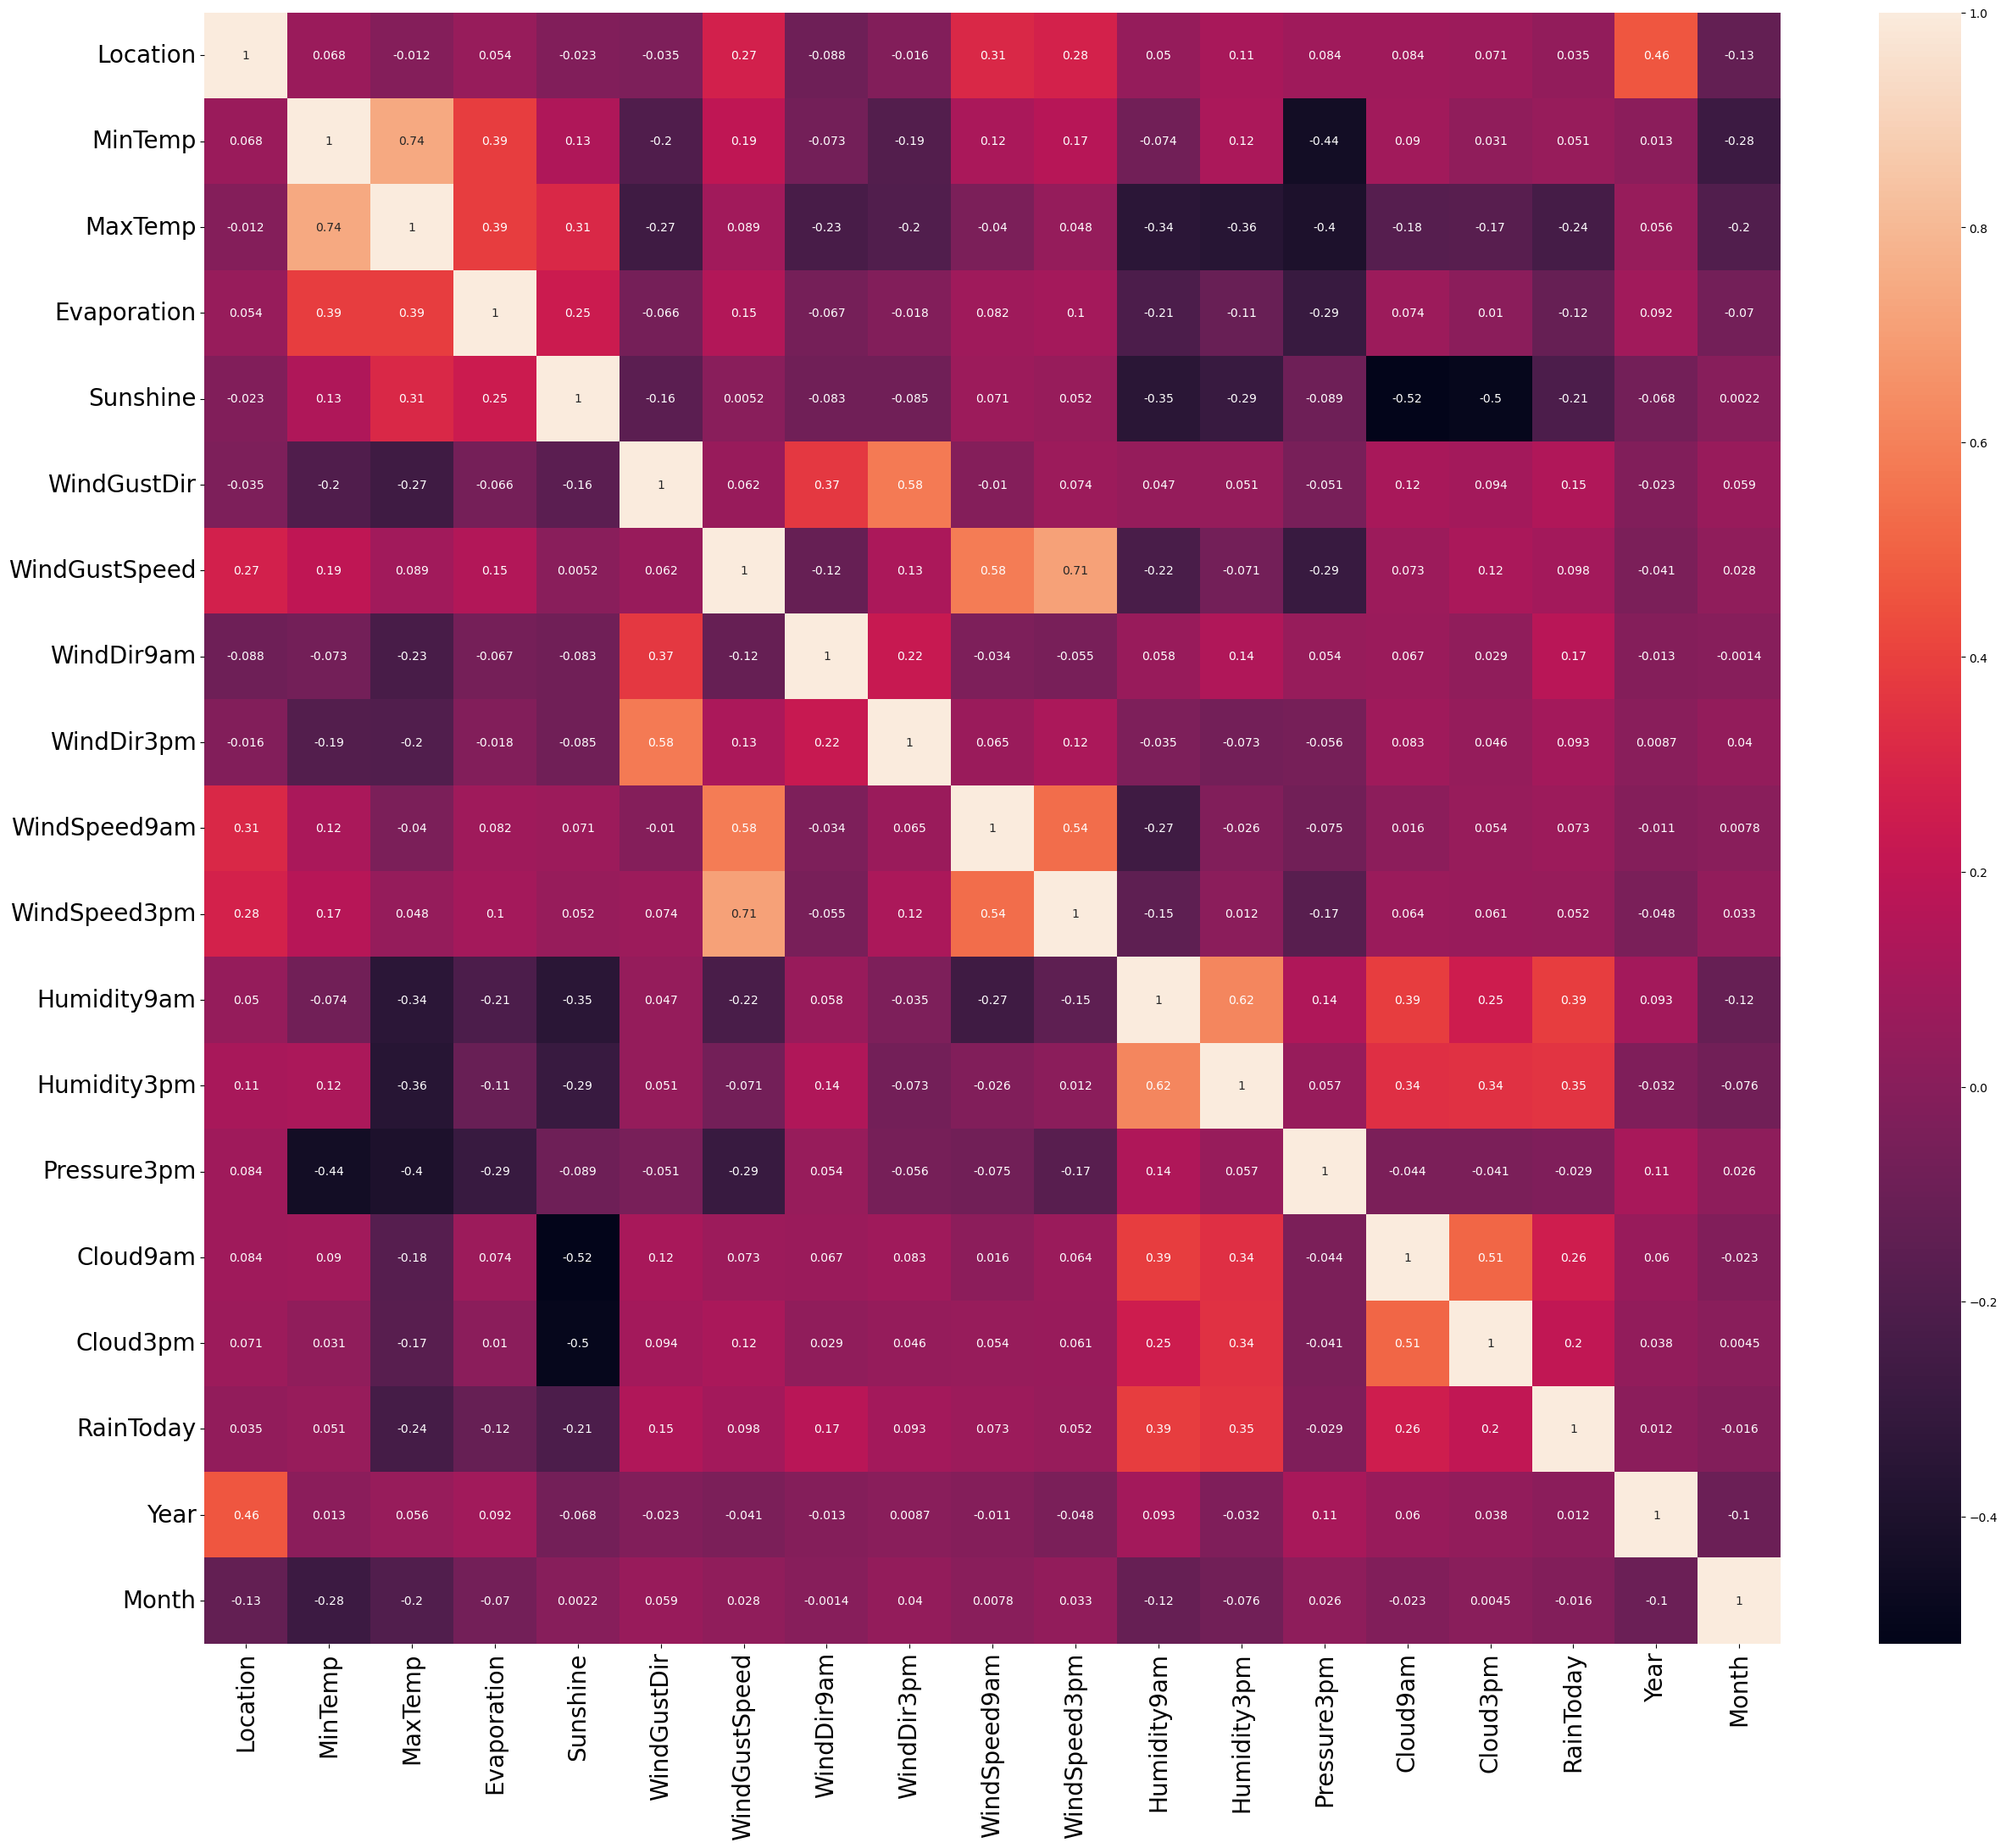

In [73]:
# check heatmap
plt.figure(figsize=(30,25))
sns.heatmap(scal.corr(),annot=True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

data is not present multicolineaity problem

In [74]:
# month data not contribute to label we delect this feature
scal.drop('Month',axis=1,inplace=True)

<Axes: xlabel='RainTomorrow', ylabel='count'>

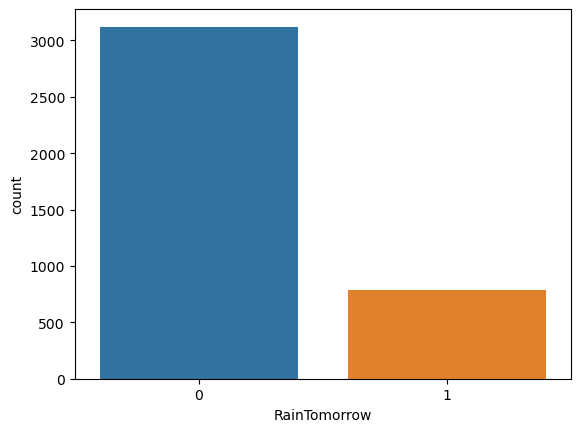

In [75]:
# check data balance or not
sns.countplot(data=df,x='RainTomorrow')

In [76]:
# we balanced data using smote method
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [78]:
om = SMOTE(sampling_strategy=0.80,random_state=355,k_neighbors=3)
x_train,x_test,y_train,y_test= train_test_split(scal,y,test_size=0.30,random_state=355)

In [79]:
Counter(y_train)

Counter({0: 2180, 1: 557})

In [80]:
X_train,Y_train = om.fit_resample(x_train,y_train)
Counter(Y_train)

Counter({0: 2180, 1: 1744})

In [81]:
# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV,GridSearchCV

In [82]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score :
 0.8126064735945485


Confusion Score :
 [[788 153]
 [ 67 166]]


Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       941
           1       0.52      0.71      0.60       233

    accuracy                           0.81      1174
   macro avg       0.72      0.77      0.74      1174
weighted avg       0.84      0.81      0.82      1174



In [83]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,knn_pred))

Accuracy Score :
 0.7793867120954003


Confusion Score :
 [[758 183]
 [ 76 157]]


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.81      0.85       941
           1       0.46      0.67      0.55       233

    accuracy                           0.78      1174
   macro avg       0.69      0.74      0.70      1174
weighted avg       0.82      0.78      0.79      1174



In [84]:
# baggingclassifier model
bg = BaggingClassifier()
bg.fit(X_train,Y_train)
bg_pred = bg.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,bg_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,bg_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,bg_pred))

Accuracy Score :
 0.838160136286201


Confusion Score :
 [[855  86]
 [104 129]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       941
           1       0.60      0.55      0.58       233

    accuracy                           0.84      1174
   macro avg       0.75      0.73      0.74      1174
weighted avg       0.83      0.84      0.84      1174



In [85]:
rmf = RandomForestClassifier()
rmf.fit(X_train,Y_train)
rmf_pred = rmf.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,rmf_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,rmf_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,rmf_pred))

Accuracy Score :
 0.8594548551959114


Confusion Score :
 [[881  60]
 [105 128]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       941
           1       0.68      0.55      0.61       233

    accuracy                           0.86      1174
   macro avg       0.79      0.74      0.76      1174
weighted avg       0.85      0.86      0.85      1174



In [86]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
ada_pred = ada.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,ada_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,ada_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,ada_pred))

Accuracy Score :
 0.7947189097103918


Confusion Score :
 [[784 157]
 [ 84 149]]


Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       941
           1       0.49      0.64      0.55       233

    accuracy                           0.79      1174
   macro avg       0.70      0.74      0.71      1174
weighted avg       0.82      0.79      0.80      1174



In [87]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
gbc_pred = gbc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,gbc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,gbc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,gbc_pred))

Accuracy Score :
 0.8347529812606473


Confusion Score :
 [[841 100]
 [ 94 139]]


Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       941
           1       0.58      0.60      0.59       233

    accuracy                           0.83      1174
   macro avg       0.74      0.75      0.74      1174
weighted avg       0.84      0.83      0.84      1174



In [88]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,dt_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,dt_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,dt_pred))

Accuracy Score :
 0.7529812606473595


Confusion Score :
 [[767 174]
 [116 117]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       941
           1       0.40      0.50      0.45       233

    accuracy                           0.75      1174
   macro avg       0.64      0.66      0.64      1174
weighted avg       0.78      0.75      0.76      1174



In [89]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_pred = svc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,svc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,svc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,svc_pred))

Accuracy Score :
 0.8458262350936968


Confusion Score :
 [[838 103]
 [ 78 155]]


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       941
           1       0.60      0.67      0.63       233

    accuracy                           0.85      1174
   macro avg       0.76      0.78      0.77      1174
weighted avg       0.85      0.85      0.85      1174



In [90]:
LR_score = cross_val_score(LR,X_train,Y_train,cv=20)
print(LR_score)
print(LR_score.mean())
print(accuracy_score(y_test,y_pred) - LR_score.mean())

[0.73604061 0.76649746 0.79187817 0.76649746 0.76530612 0.80612245
 0.79591837 0.73469388 0.73979592 0.7755102  0.76530612 0.7755102
 0.81632653 0.74489796 0.71938776 0.72959184 0.80102041 0.82142857
 0.80102041 0.79591837]
0.7724334403812287
0.040173033213319775


In [91]:
bg_score = cross_val_score(bg,X_train,Y_train,cv=20)
print(bg_score)
print(bg_score.mean())
print(accuracy_score(y_test,bg_pred) - bg_score.mean())

[0.8071066  0.82741117 0.82233503 0.76649746 0.81632653 0.81632653
 0.91326531 0.94387755 0.92346939 0.8622449  0.87755102 0.92346939
 0.94387755 0.89795918 0.90816327 0.90306122 0.93877551 0.92346939
 0.92857143 0.92857143]
0.8836164922821919
-0.04545635599599085


In [92]:
rmf_score = cross_val_score(rmf,X_train,Y_train,cv=20)
print(rmf_score)
print(rmf_score.mean())
print(accuracy_score(y_test,rmf_pred) - rmf_score.mean())

[0.84771574 0.84263959 0.86294416 0.85786802 0.87755102 0.89795918
 0.90816327 0.95918367 0.89285714 0.94387755 0.94897959 0.93877551
 0.93877551 0.92857143 0.91326531 0.93877551 0.95408163 0.96428571
 0.96938776 0.94897959]
0.9167318450222728
-0.057276989826361424


In [93]:
gbc_score = cross_val_score(gbc,X_train,Y_train,cv=20)
print(gbc_score)
print(gbc_score.mean())
print(accuracy_score(y_test,gbc_pred) - gbc_score.mean())

[0.76649746 0.7715736  0.77664975 0.81218274 0.79081633 0.79081633
 0.91836735 0.91326531 0.85714286 0.8877551  0.89795918 0.90306122
 0.89795918 0.87244898 0.8622449  0.8622449  0.92857143 0.90306122
 0.90306122 0.93877551]
0.8627227286853827
-0.027969747424735347


In [94]:
ada_score = cross_val_score(ada,X_train,Y_train,cv=20)
print(ada_score)
print(ada_score.mean())
print(accuracy_score(y_test,ada_pred) - ada_score.mean())

[0.77664975 0.7715736  0.74111675 0.72081218 0.78061224 0.76530612
 0.82653061 0.89795918 0.81632653 0.82653061 0.83673469 0.82653061
 0.86734694 0.7755102  0.78571429 0.79591837 0.8877551  0.8622449
 0.8622449  0.87244898]
0.8147933284989122
-0.020074418788520343


In [95]:
knn_score = cross_val_score(knn,X_train,Y_train,cv=20)
print(knn_score)
print(knn_score.mean())
print(accuracy_score(y_test,knn_pred) - knn_score.mean())

[0.82233503 0.84771574 0.85279188 0.79187817 0.83673469 0.86734694
 0.85204082 0.85204082 0.80612245 0.8622449  0.83163265 0.91326531
 0.88265306 0.86734694 0.86734694 0.88265306 0.88265306 0.90816327
 0.92857143 0.8877551 ]
0.8621646120377084
-0.08277789994230811


In [96]:
dt_score = cross_val_score(dt,X_train,Y_train,cv=20)
print(dt_score)
print(dt_score.mean())
print(accuracy_score(y_test,dt_pred) - dt_score.mean())

[0.74619289 0.7715736  0.73604061 0.71573604 0.75510204 0.79081633
 0.85714286 0.89285714 0.83163265 0.85714286 0.84693878 0.87755102
 0.8877551  0.81632653 0.82653061 0.85204082 0.83163265 0.89285714
 0.8877551  0.8877551 ]
0.8280689940950999
-0.07508773344774045


In [97]:
svc_score = cross_val_score(svc,X_train,Y_train,cv=20)
print(svc_score)
print(svc_score.mean())
print(accuracy_score(y_test,svc_pred) - svc_score.mean())

[0.81725888 0.82233503 0.83756345 0.82741117 0.84183673 0.8622449
 0.8622449  0.90816327 0.86734694 0.89795918 0.89285714 0.90306122
 0.90306122 0.8622449  0.85714286 0.86734694 0.86734694 0.92346939
 0.91836735 0.91326531]
0.8726263855796124
-0.026800150485915553


# the best model is KNN model

In [98]:
params = {'n_neighbors':np.arange(1,10),
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':np.arange(1,10)
             }

In [99]:
KNN = GridSearchCV(estimator=knn,param_grid=params,cv=15,scoring='accuracy')
KNN.fit(X_train,Y_train)
KNN.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}

In [100]:
Knn = KNeighborsClassifier(weights= 'uniform', 
                           n_neighbors= 1, 
                           leaf_size= 1, 
                           algorithm= 'auto')
Knn.fit(X_train,Y_train)
Knn_pred = Knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,Knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,Knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,Knn_pred))

Accuracy Score :
 0.7938671209540034


Confusion Score :
 [[812 129]
 [113 120]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       941
           1       0.48      0.52      0.50       233

    accuracy                           0.79      1174
   macro avg       0.68      0.69      0.68      1174
weighted avg       0.80      0.79      0.80      1174



In [101]:
df

Location  MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4 -0.173637       0.6     0.170172  -0.11838   
1            1      7.4  0.179791       0.0     0.170172  -0.11838   
2            1     12.9  0.273405       0.0     0.170172  -0.11838   
3            1      9.2  0.622278       0.0     0.170172  -0.11838   
4            1     17.5  1.237079       1.0     0.170172  -0.11838   
...        ...      ...       ...       ...          ...       ...   
8419         8      3.5 -0.356849       0.0     0.170172  -0.11838   
8420         8      2.8 -0.091842       0.0     0.170172  -0.11838   
8421         8      3.6  0.211121       0.0     0.170172  -0.11838   
8422         8      5.4  0.457335       0.0     0.170172  -0.11838   
8423         8      7.8  0.472471       0.0     0.170172  -0.11838   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0              13       0.425131          13          14  ...    -1.527735   
1              14       0.425131           6          15  ...    -1.070475   
2              15       0.554813          13          15  ...    -1.543527   
3               4      -1.222602           9           0  ...     0.027495   
4              13       0.221654           1           7  ...    -1.038991   
...           ...            ...         ...         ...  ...          ...   
8419            0      -0.553840           2           0  ...     1.132923   
8420            0      -0.553840           9           1  ...     1.117410   
8421            6      -1.441211           9           3  ...     0.946667   
8422            3      -0.068624           9          14  ...     0.557881   
8423            9      -0.824442          10           3  ...     0.308524   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am   Temp3pm  RainToday  \
0       -1.243513  8.000000  4.320988     16.9 -0.123797          0   
1       -1.131110  4.336806  4.320988     17.2  0.284029          0   
2       -0.986843  4.336806  2.000000     21.0  0.107340          0   
3       -0.333155  4.336806  4.320988     18.1  0.625611          0   
4       -1.420489  7.000000  8.000000     17.8  1.097608          0   
...           ...       ...       ...      ...       ...        ...   
8419     0.988271  4.336806  4.320988      9.4 -0.276370          0   
8420     0.847823  4.336806  4.320988     10.1 -0.023845          0   
8421     0.660138  4.336806  4.320988     10.9  0.315716          0   
8422     0.299060  4.336806  4.320988     12.5  0.564610          0   
8423     0.251832  3.000000  2.000000     15.1  0.549286          0   

      RainTomorrow  Year  Month  
0                0  2008     12  
1                0  2008     12  
2                0  2008     12  
3                0  2008     12  
4                0  2008     12  
...            ...   ...    ...  
8419             0  2017      6  
8420             0  2017      6  
8421             0  2017      6  
8422             0  2017      6  
8423             0  2017      6  

[3911 rows x 24 columns]

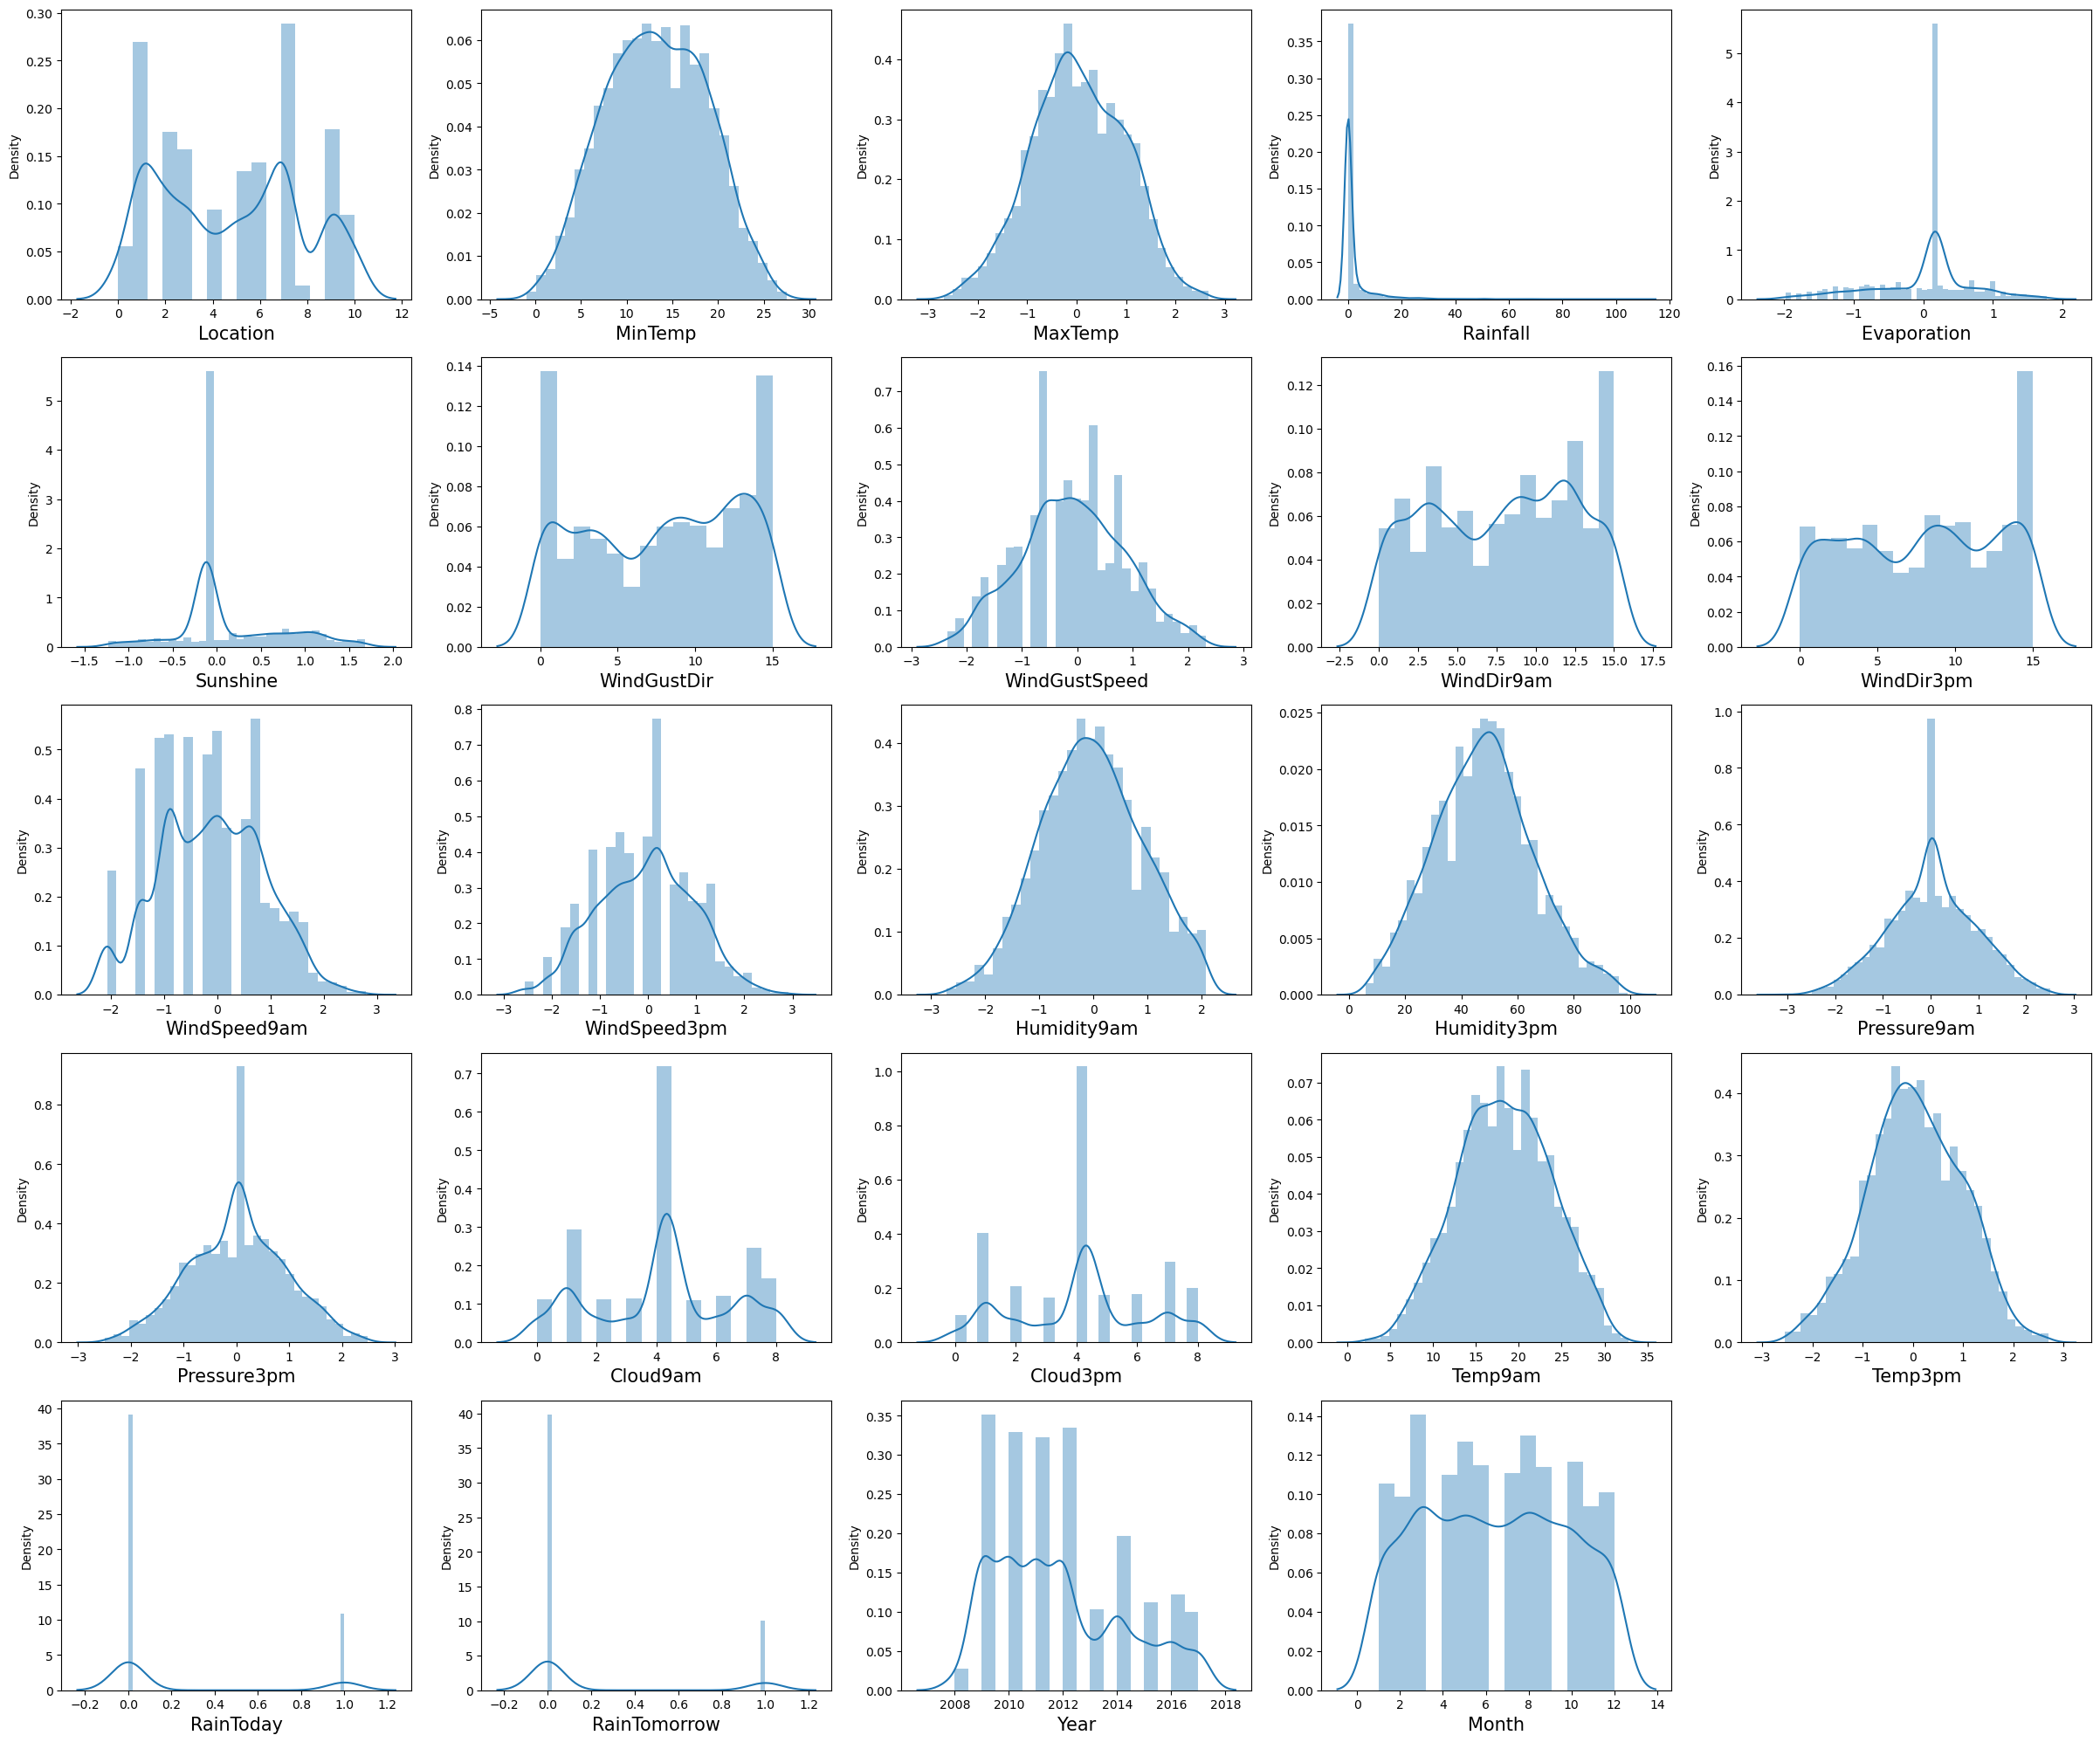

In [102]:
# check data distribution usiing distplot
plt.figure(figsize=(30,25))
plotnumber=1

for i in df:
    if plotnumber<=25:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [103]:
X = df.drop('Rainfall',axis=1)
Y = df['Rainfall']

In [104]:
X.corrwith(Y)

Location         0.029118
MinTemp          0.082386
MaxTemp         -0.122204
Evaporation     -0.024655
Sunshine        -0.150322
WindGustDir      0.069746
WindGustSpeed    0.086132
WindDir9am       0.110427
WindDir3pm       0.053919
WindSpeed9am     0.068608
WindSpeed3pm     0.032861
Humidity9am      0.278713
Humidity3pm      0.266022
Pressure9am     -0.095049
Pressure3pm     -0.033005
Cloud9am         0.196307
Cloud3pm         0.149146
Temp9am         -0.034800
Temp3pm         -0.129188
RainToday        0.581650
RainTomorrow     0.272610
Year             0.024510
Month           -0.048237
dtype: float64

<Axes: >

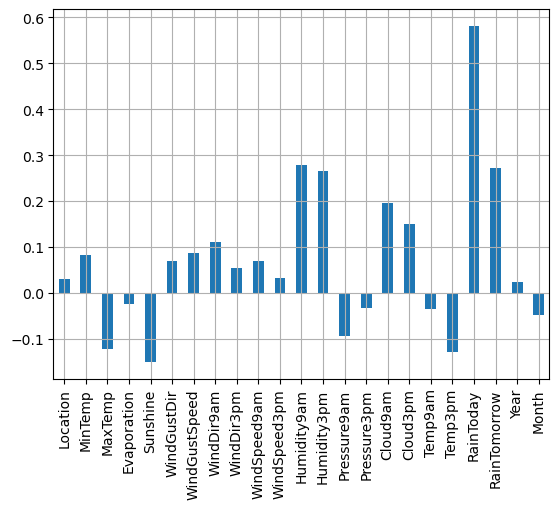

In [105]:
X.corrwith(Y).plot(kind='bar',grid=True)

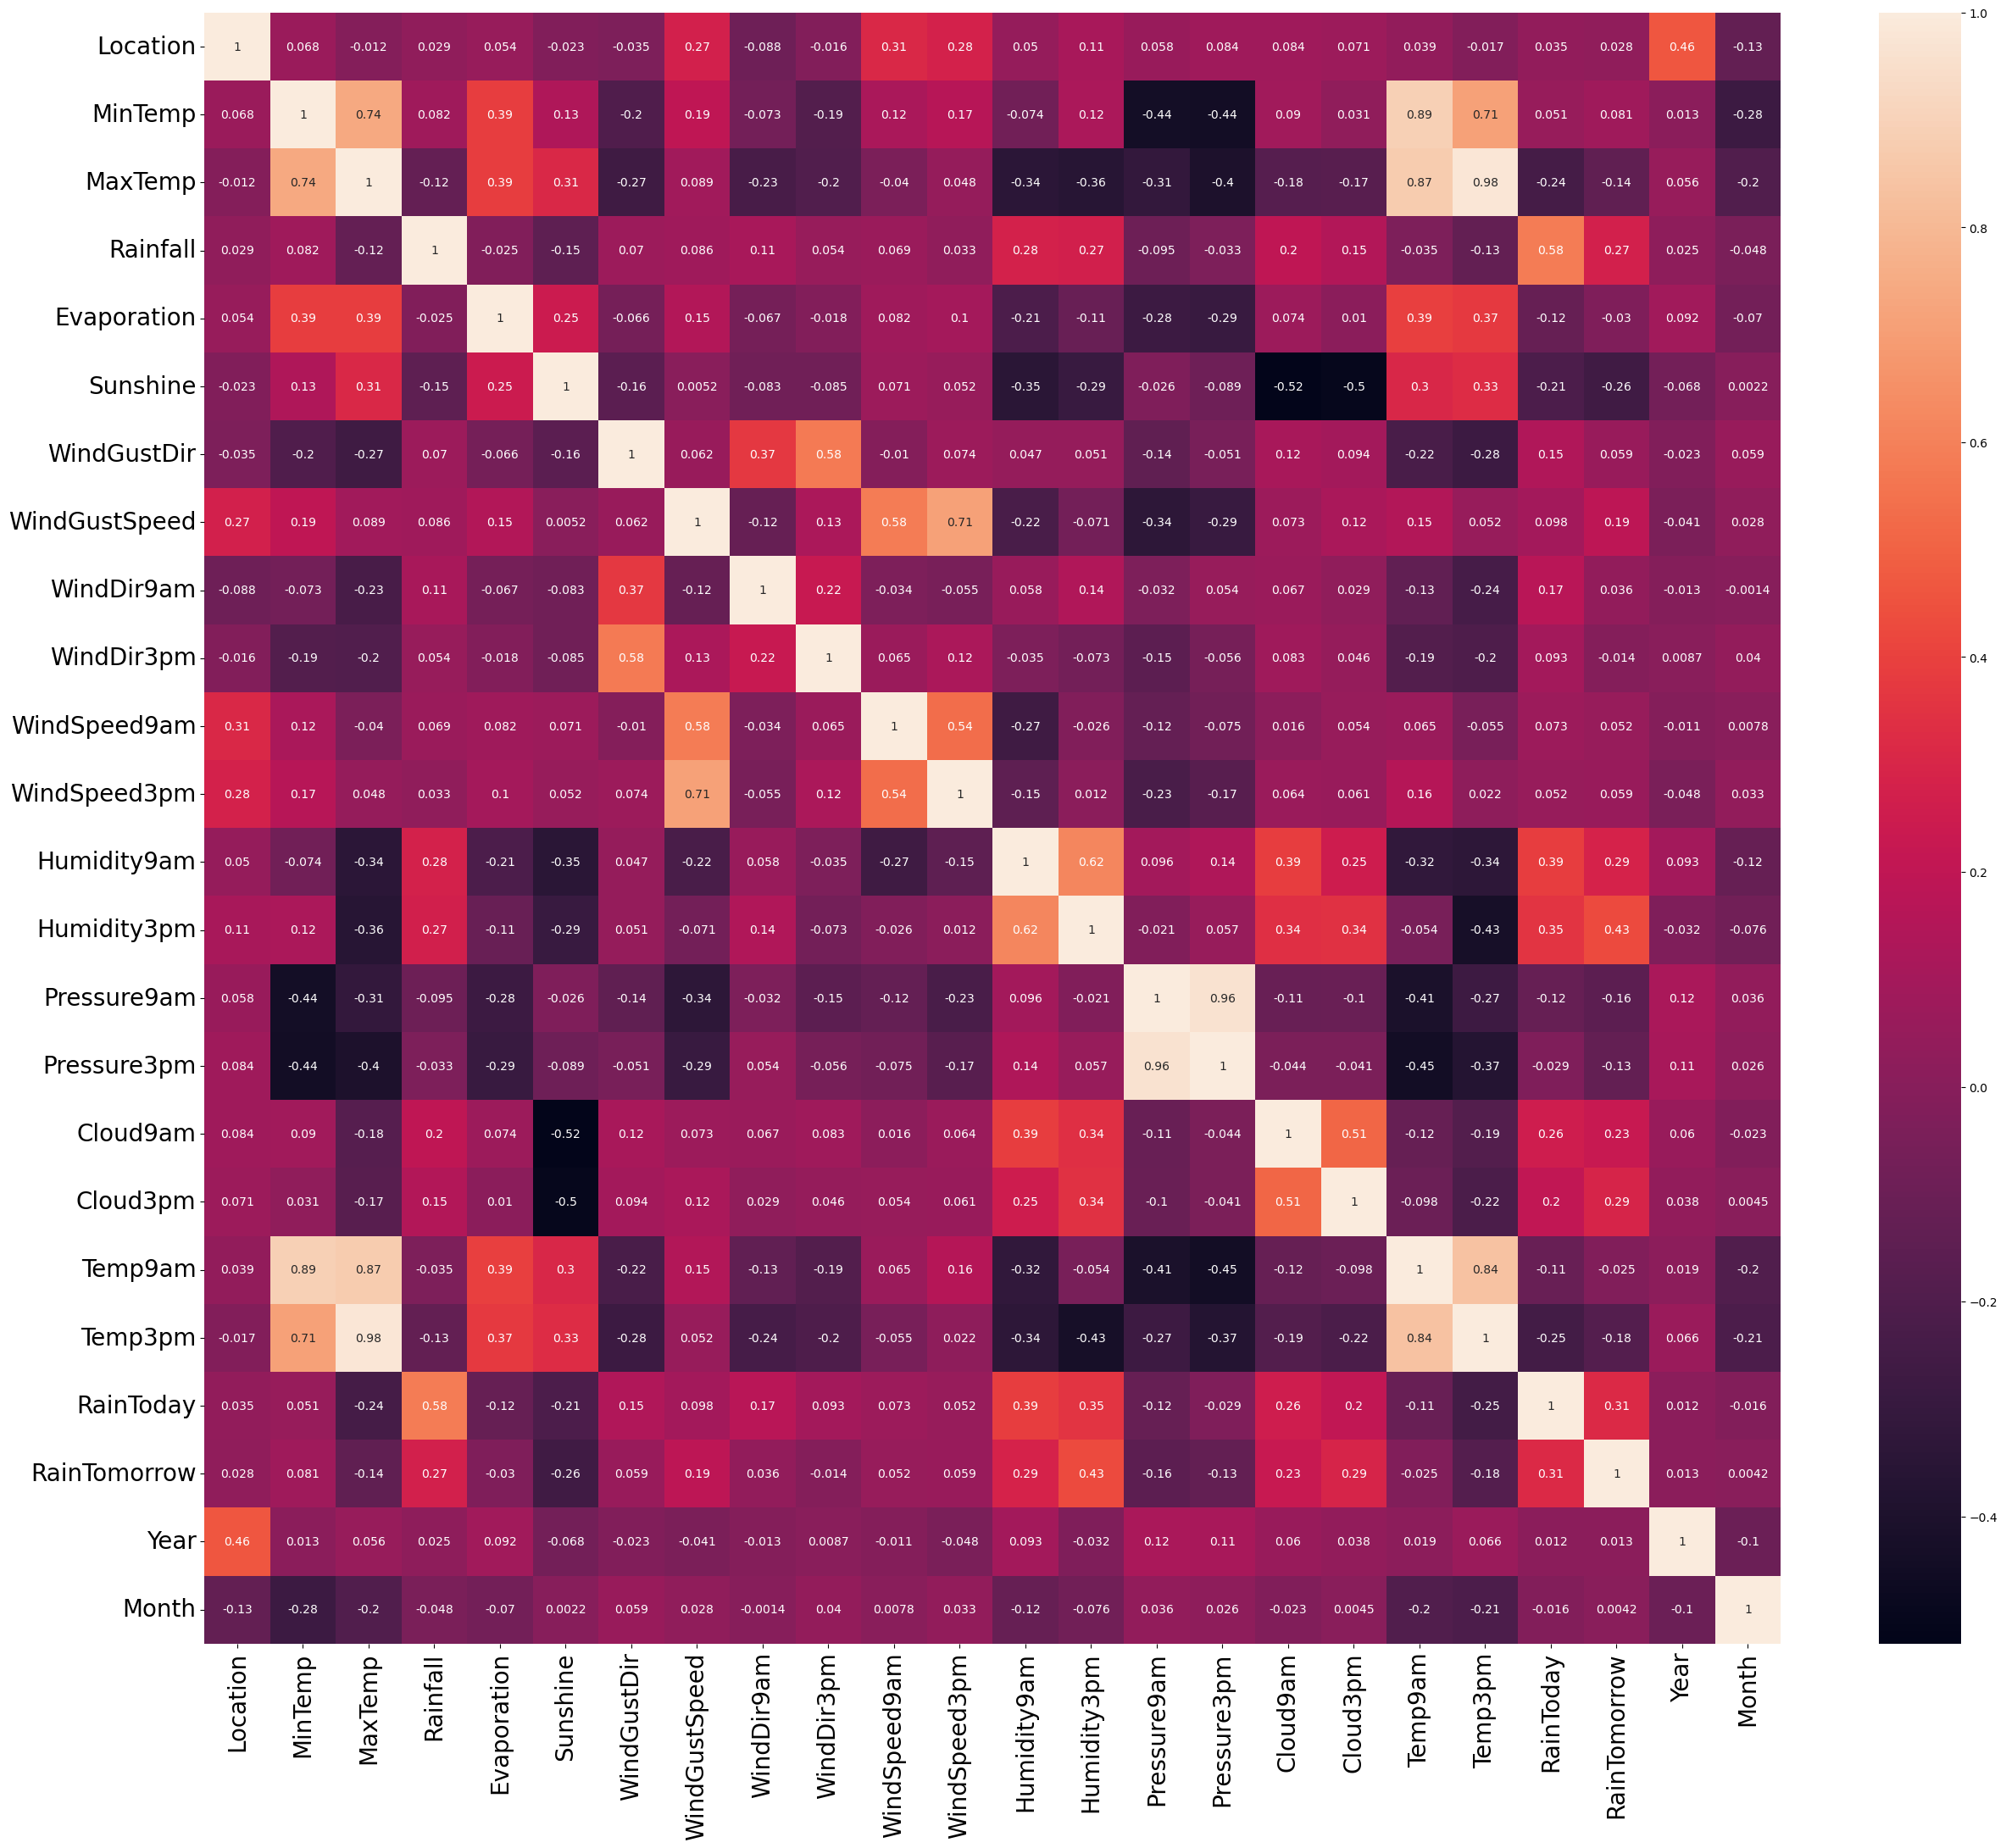

In [106]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [107]:
Scaled = StandardScaler()
Scal = pd.DataFrame(Scaled.fit_transform(X),columns=X.columns)

In [108]:
V = []
for i in range(Scal.shape[1]):
    X = variance_inflation_factor(Scal,i)
    V.append(X)
vif = pd.DataFrame()
vif['vif'] = V
vif['feature'] = Scal.columns
vif

vif        feature
0    1.642357       Location
1    8.838950        MinTemp
2   36.929497        MaxTemp
3    1.417879    Evaporation
4    1.889070       Sunshine
5    1.751620    WindGustDir
6    2.964466  WindGustSpeed
7    1.324382     WindDir9am
8    1.680995     WindDir3pm
9    1.948844   WindSpeed9am
10   2.377407   WindSpeed3pm
11   3.841508    Humidity9am
12   6.020611    Humidity3pm
13  20.453825    Pressure9am
14  19.353461    Pressure3pm
15   1.878306       Cloud9am
16   1.659318       Cloud3pm
17  17.853304        Temp9am
18  45.897728        Temp3pm
19   1.446744      RainToday
20   1.459522   RainTomorrow
21   1.460855           Year
22   1.185291          Month

In [109]:
Scal.drop(['Temp3pm','Pressure9am','MaxTemp'],axis=1,inplace=True)


In [110]:
V = []
for i in range(Scal.shape[1]):
    X = variance_inflation_factor(Scal,i)
    V.append(X)
vif = pd.DataFrame()
vif['vif'] = V
vif['feature'] = Scal.columns
vif

vif        feature
0   1.636371       Location
1   8.668096        MinTemp
2   1.404410    Evaporation
3   1.874526       Sunshine
4   1.735143    WindGustDir
5   2.905861  WindGustSpeed
6   1.278630     WindDir9am
7   1.583622     WindDir3pm
8   1.928819   WindSpeed9am
9   2.341101   WindSpeed3pm
10  2.946463    Humidity9am
11  2.253218    Humidity3pm
12  1.513728    Pressure3pm
13  1.860737       Cloud9am
14  1.630761       Cloud3pm
15  9.395857        Temp9am
16  1.377223      RainToday
17  1.448894   RainTomorrow
18  1.455045           Year
19  1.155219          Month

In [111]:
# import all model building lib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV

In [112]:
xs_train,xs_test,ys_train,ys_test = train_test_split(Scal,Y,test_size=0.30,random_state=255)

In [113]:
lr = LinearRegression()
lr.fit(xs_train,ys_train)
Y_pred = lr.predict(xs_test)
print('R2_score:',r2_score(ys_test,Y_pred))
print('Training Score:',lr.score(xs_train,ys_train))
print('Testing Score :',lr.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,Y_pred))
print('mean squared error :', mean_squared_error(ys_test,Y_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,Y_pred)))

R2_score: 0.33831969050257693
Training Score: 0.36464299726833516
Testing Score : 0.33831969050257693
mean absolute error : 2.225843145760996
mean squared error : 33.25210664993596
Root means squared error : 5.766463964158274


In [114]:
lassocv = LassoCV(alphas=None,max_iter=10)
lassocv.fit(xs_train,ys_train)
alpha = lassocv.alpha_
alpha

0.11914479219807138

In [115]:
# Lasso regression model 
lasso = Lasso(alpha,max_iter=10)
lasso.fit(xs_train,ys_train)
lasso_pred = lasso.predict(xs_test)
print('R2_score:',r2_score(ys_test,lasso_pred))
print('Training Score:',lasso.score(xs_train,ys_train))
print('Testing Score :',lasso.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,lasso_pred))
print('mean squared error :', mean_squared_error(ys_test,lasso_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,lasso_pred)))

R2_score: 0.33627970332863555
Training Score: 0.35975394843361364
Testing Score : 0.33627970332863555
mean absolute error : 2.052010577136394
mean squared error : 33.3546242405288
Root means squared error : 5.77534624421158


In [116]:
ridgeCV = RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgeCV.fit(xs_train,ys_train)
alpha = ridgeCV.alpha_

In [117]:
# Ridge regression model 
ridge = Ridge(alpha=alpha)
ridge.fit(xs_train,ys_train)
ridge_pred = ridge.predict(xs_test)
print('R2_score:',r2_score(ys_test,ridge_pred))
print('Training Score:',ridge.score(xs_train,ys_train))
print('Testing Score :',ridge.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,ridge_pred))
print('mean squared error :', mean_squared_error(ys_test,ridge_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,ridge_pred)))

R2_score: 0.33832103929740254
Training Score: 0.36464299651369503
Testing Score : 0.33832103929740254
mean absolute error : 2.225807806791359
mean squared error : 33.2520388675511
Root means squared error : 5.766458086863295


In [118]:
# GradientBoosting regression model 
gb = GradientBoostingRegressor()
gb.fit(xs_train,ys_train)
gb_pred = gb.predict(xs_test)
print('R2_score:',r2_score(ys_test,gb_pred))
print('Training Score:',gb.score(xs_train,ys_train))
print('Testing Score :',gb.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,gb_pred))
print('mean squared error :', mean_squared_error(ys_test,gb_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,gb_pred)))

R2_score: 0.3356948360952291
Training Score: 0.7297912767663925
Testing Score : 0.3356948360952291
mean absolute error : 1.9956317492874873
mean squared error : 33.38401618002305
Root means squared error : 5.7778902879877405


In [119]:
# Randamforest Regression model 
RF = RandomForestRegressor()
RF.fit(xs_train,ys_train)
RF_pred = RF.predict(xs_test)
print('R2_score:',r2_score(ys_test,RF_pred))
print('Training Score:',RF.score(xs_train,ys_train))
print('Testing Score :',RF.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,RF_pred))
print('mean squared error :', mean_squared_error(ys_test,RF_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,RF_pred)))

R2_score: 0.32551876019397075
Training Score: 0.9081090287019168
Testing Score : 0.32551876019397075
mean absolute error : 1.8769880749574104
mean squared error : 33.895405073253826
Root means squared error : 5.821976045403642


In [120]:
# AdaBoost Regression model
ada = AdaBoostRegressor()
ada.fit(xs_train,ys_train)
ada_pred = ada.predict(xs_test)
print('R2_score:',r2_score(ys_test,ada_pred))
print('Training Score:',ada.score(xs_train,ys_train))
print('Testing Score :',ada.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,ada_pred))
print('mean squared error :', mean_squared_error(ys_test,ada_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,ada_pred)))

R2_score: -1.401535790770851
Training Score: -1.4995801602670324
Testing Score : -1.401535790770851
mean absolute error : 9.306297246590484
mean squared error : 120.68686810252078
Root means squared error : 10.98575751154743


In [121]:
# KNeighbors Regression model
knn = KNeighborsRegressor()
knn.fit(xs_train,ys_train)
knn_pred = knn.predict(xs_test)
print('R2_score:',r2_score(ys_test,knn_pred))
print('Training Score:',knn.score(xs_train,ys_train))
print('Testing Score :',knn.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,knn_pred))
print('mean squared error :', mean_squared_error(ys_test,knn_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,knn_pred)))

R2_score: 0.34567537454566777
Training Score: 0.5274724999837717
Testing Score : 0.34567537454566777
mean absolute error : 1.7919250425894377
mean squared error : 32.882453833049404
Root means squared error : 5.734322438880587


In [122]:
# DecisionTree Regression model
dt = DecisionTreeRegressor()
dt.fit(xs_train,ys_train)
dt_pred = dt.predict(xs_test)
print('R2_score:',r2_score(ys_test,dt_pred))
print('Training Score:',dt.score(xs_train,ys_train))
print('Testing Score :',dt.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,dt_pred))
print('mean squared error :', mean_squared_error(ys_test,dt_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,dt_pred)))

R2_score: -0.0849332253510926
Training Score: 1.0
Testing Score : -0.0849332253510926
mean absolute error : 2.345229982964225
mean squared error : 54.522274275979555
Root means squared error : 7.383919980334264


In [123]:
# support vector machine regression model 
svr = SVR()
svr.fit(xs_train,ys_train)
svr_pred = svr.predict(xs_test)
print('R2_score:',r2_score(ys_test,svr_pred))
print('Training Score:',svr.score(xs_train,ys_train))
print('Testing Score :',svr.score(xs_test,ys_test))
print('mean absolute error :', mean_absolute_error(ys_test,svr_pred))
print('mean squared error :', mean_squared_error(ys_test,svr_pred))
print('Root means squared error :', np.sqrt(mean_squared_error(ys_test,svr_pred)))

R2_score: 0.24808025356581187
Training Score: 0.27475048978049643
Testing Score : 0.24808025356581187
mean absolute error : 1.6463645859575058
mean squared error : 37.78700263819744
Root means squared error : 6.147113358170438


In [124]:
lr_score = cross_val_score(lr,xs_train,ys_train,cv=20,scoring='r2')
print(lr_score)
print(lr_score.mean())
print(r2_score(ys_test,Y_pred) - lr_score.mean())

[0.34619168 0.47134066 0.25725095 0.22004149 0.32237955 0.44056445
 0.31387457 0.43148993 0.4969001  0.50657535 0.32824124 0.56305626
 0.23460399 0.23410569 0.36182647 0.39657036 0.36866225 0.36481369
 0.39147263 0.45304514]
0.3751503218131815
-0.036830631310604545


In [125]:
lasso_score = cross_val_score(lasso,xs_train,ys_train,cv=20,scoring='r2')
print(lasso_score)
print(lasso_score.mean())
print(r2_score(ys_test,lasso_pred) - lasso_score.mean())

[0.34756723 0.50232543 0.27710442 0.21635775 0.36350931 0.46345772
 0.31644037 0.445825   0.48673033 0.49695792 0.34594561 0.56276939
 0.22583941 0.26657031 0.35275824 0.39204894 0.37413619 0.35971293
 0.37882514 0.44551998]
0.3810200809952188
-0.04474037766658323


In [126]:
ridge_score = cross_val_score(ridge,xs_train,ys_train,cv=20,scoring='r2')
print(ridge_score)
print(ridge_score.mean())
print(r2_score(ys_test,ridge_pred) - ridge_score.mean())

[0.3461896  0.47134687 0.25727017 0.22003799 0.32240098 0.44057189
 0.31387833 0.43149054 0.49690218 0.50657694 0.32825484 0.56305156
 0.23459985 0.23415342 0.36182002 0.39657202 0.36866787 0.36481478
 0.39146633 0.45304154]
0.37515538619343547
-0.03683434689603293


In [127]:
RF_score = cross_val_score(RF,xs_train,ys_train,cv=20,scoring='r2')
print(RF_score)
print(RF_score.mean())
print(r2_score(ys_test,RF_pred) - RF_score.mean())

[ 0.19997124  0.54943278  0.19211094  0.21133501 -0.88018838  0.33607032
  0.23596785  0.37242725  0.62682927  0.59790872  0.41583474  0.56713841
  0.27228053  0.03702751  0.43657615  0.39159417  0.23287881  0.3382498
  0.35657836  0.45345962]
0.29717415555231214
0.02834460464165861


In [129]:
gb_score = cross_val_score(gb,xs_train,ys_train,cv=20,scoring='r2')
print(gb_score)
print(gb_score.mean())
print(r2_score(ys_test,gb_pred) - gb_score.mean())

[ 0.33725152  0.40128943 -0.14477292  0.26070459 -0.4367372   0.44939011
  0.23824321  0.33082638  0.61726655  0.57876901  0.12953174  0.49896888
  0.19802778  0.40136342  0.33899549  0.56051479  0.30655046  0.34658403
  0.27312661  0.34887162]
0.30173827475264214
0.033956561342586955


In [130]:
knn_score = cross_val_score(knn,xs_train,ys_train,cv=20,scoring='r2')
print(knn_score)
print(knn_score.mean())
print(r2_score(ys_test,knn_pred) - knn_score.mean())

[ 0.25009378  0.28735699  0.14381347  0.17615587  0.35053747  0.40892919
  0.22917546  0.35305503  0.5066074   0.1829712   0.40753232  0.55293972
  0.15021967  0.36390186  0.33880089  0.30644258  0.38315164  0.27204288
  0.45185503 -0.15258671]
0.29814978722980207
0.0475255873158657


In [132]:
svr_score = cross_val_score(svr,xs_train,ys_train,cv=20,scoring='r2')
print(svr_score)
print(svr_score.mean())
print(r2_score(ys_test,svr_pred) - svr_score.mean())

[0.23826185 0.374919   0.34336535 0.10778141 0.31172819 0.37777149
 0.19550069 0.28515923 0.36800612 0.35920355 0.31656221 0.36631918
 0.12334955 0.59681927 0.20991704 0.28907604 0.32450123 0.23564878
 0.22250671 0.32510538]
0.29857511415783095
-0.050494860592019075


# the best model is SVR model

increase accuracy using hyperparameter tuning 

<Axes: ylabel='Rainfall'>

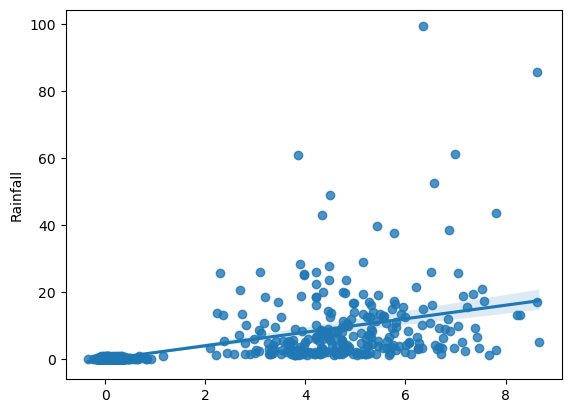

In [140]:
sns.regplot(x=svr_pred,y=ys_test)

In [141]:
import pickle
filename = 'rainfall.pkl'
pickle.dump(svr,open(filename,'wb'))

In [143]:
load = pickle.load(open('rainfall.pkl','rb'))
load.score(xs_test,ys_test)

0.24808025356581187